### 1. Introduction

#### Problem statement

https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

This project is used to demonstrate *CLUSTERING METHODS*

**Objective**

Segment customers based on all attributes provided in the dataset to understand how different segments are interested in different products

**Data Description**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

The data provided describes people attributes, product purchases, promotions, point of sale.
The detailed data dictionary is given below.

**Data Dictionary**

*People*

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

*Products*

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

*Promotion*

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

*Place*

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

### 2. Import relevant libraries

In [1]:
# To help with reading and manipulating data
import numpy as np
import pandas as pd

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# To compute distances
from scipy.spatial.distance import cdist

# To perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# To perform hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  # Pairwise distribution between data points

import warnings

warnings.filterwarnings("ignore")

### 3. Reading Dataset

In [2]:
# Import the dataset into the project notebook
df = pd.read_csv("marketing_campaign.csv", sep="\t")

In [3]:
# Create a copy
cust = df.copy()

### 4. Dataset Characteristics

In [4]:
# dataset sample to get a feel for the rows and columns
cust.sample(
    15, random_state=2
)  # setting the random_state to get the same results every time

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2053  10509        1955      Master         Single  36927.0        1   
2019   2375        1972  Graduation       Together  30261.0        1   
1891   3010        1989      Master       Together  88420.0        0   
335   10151        1960  Graduation       Divorced  62204.0        0   
1600   5272        1965      Master        Married  53843.0        0   
1459   2525        1974         PhD        Married  38410.0        0   
2161    902        1980  Graduation       Together  62994.0        1   
1026   3706        1978  Graduation         Single  28647.0        1   
68     4477        1958  Graduation       Together  69096.0        0   
2088   6507        1980  Graduation         Single  30828.0        1   
98     4646        1951    2n Cycle        Married  78497.0        0   
1798   8439        1964  Graduation       Together  63404.0        0   
2228   8720        1978    2n Cycle       Together      NaN        0   
1433    274        1973  Graduation         Single  34853.0        1   
280    4669        1981       Basic        Married  24480.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2053         1  02-06-2014       46        51          0               16   
2019         2  25-09-2012       75         8          0                5   
1891         0  02-05-2014       87       957        153              612   
335          2  12-09-2012       38       317         46              247   
1600         1  27-06-2013       64       378          0               88   
1459         0  14-09-2012       65       153         64              123   
2161         0  04-03-2014       74       224         12               48   
1026         0  21-08-2013       54        19          8               29   
68           1  27-09-2013        4       247         49              159   
2088         0  04-10-2013       16        16         11               15   
98           0  01-12-2013       44       207         26              447   
1798         2  06-06-2014       97       734         26               70   
2228         0  12-08-2012       53        32          2             1607   
1433         1  23-12-2013       75         9          3               15   
280          0  11-02-2013       46         4         19                9   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2053                0                 0             4                  2   
2019                0                 3             6                  1   
1891               99                95           153                  1   
335               151                46           139                  1   
1600               19                 4            73                  4   
1459              116                64            14                  2   
2161                4                12            12                  1   
1026                0                12            26                  1   
68                  7                82           109                  1   
2088                2                 0            12                  2   
98                 75                 0           223                  1   
1798               11                44            17                  2   
2228               12                 4            22                  0   
1433                2                 3             2                  2   
280                28                25            17                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2053                3                    0                  3   
2019                0                    0                  3   
1891                4                    7                  8   
335                 4                    5                 12   
1600                8                    5                  3   
1459            

In [5]:
# Shape of the data
print(f"There are {cust.shape[0]} rows and {cust.shape[1]} columns")

There are 2240 rows and 29 columns


In [6]:
# Data type of columns
cust.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [7]:
# number of non-null values in dataset
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* We do not have a description for `Z_CostContact` and `Z_Revenue`. We check if the values can provide us with any insights about these features

In [8]:
cust["Z_Revenue"].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [9]:
cust["Z_CostContact"].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

Since both `Z_CostContact` and `Z_Revenue` have single values, these would not be helpful in clustering and we can drop them from the dataset

In [10]:
cust.drop("Z_Revenue", axis=1, inplace=True)

cust.drop("Z_CostContact", axis=1, inplace=True)

In [11]:
# we also drop the customer ID since that does not provide value in clustering
cust.drop("ID", axis=1, inplace=True)

In [12]:
# null values in the dataset
cust.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

*Observations*:

- We have some null values in the `Income` column. We will address this at a later stage

In [13]:
# we convert objects to cotegorical features
cust["Education"] = cust.Education.astype("category")
cust["Marital_Status"] = cust.Marital_Status.astype("category")
cust["Dt_Customer"] = cust.Dt_Customer.astype("category")

#### There are a few other transformations we can make here to convert more features to numerical type and reduce the dimensionality that would facilitate the clustering
* Convert the `Year_Birth` to an *Age* column 
* Convert the `Dt_Customer` to a *Enrollment_Duration* column 
* Assess the *Total_Spend* by customer by summing the amount spent on Wines, Fruits, Meat Products, Fish Products, Sweet Products, Gold Products
* Evaluate the number of times the customer accepted offers by aggregating if they accepted an offer in the 1st through the 5th and the last campaign. We should then be able to drop individual columns pertaining to offer acceptance during a particular campaign

In [14]:
# extracting today's date
import datetime

Current_Date = datetime.date.today()
Current_Date = pd.to_datetime(Current_Date)

In [15]:
# calculate the age of the customer and drop year of birth
cust["Age"] = Current_Date.year - cust["Year_Birth"]
cust.drop("Year_Birth", axis=1, inplace=True)

In [16]:
# calculate the enrollment duration of the customer and drop date of enrollment
cust["Dt_Customer"] = pd.to_datetime(cust["Dt_Customer"])
cust["Enroll_Dur"] = Current_Date - cust["Dt_Customer"]

cust["Enroll_Dur"] = cust["Enroll_Dur"].astype(str)

cust["Enroll_Dur"] = cust["Enroll_Dur"].str.rsplit(" ").str[0]

cust["Enroll_Dur"] = cust.Enroll_Dur.astype(int)

cust.drop("Dt_Customer", axis=1, inplace=True)

In [17]:
# assess total spend by customer
cust["Total_Spend"] = (
    cust["MntWines"]
    + cust["MntFruits"]
    + cust["MntMeatProducts"]
    + cust["MntFishProducts"]
    + cust["MntSweetProducts"]
    + cust["MntGoldProds"]
)

In [18]:
# evaluate number of times offers are accepted across campaigns
cust["Offers_Accepted"] = (
    cust["AcceptedCmp1"]
    + cust["AcceptedCmp2"]
    + cust["AcceptedCmp3"]
    + cust["AcceptedCmp4"]
    + cust["AcceptedCmp5"]
    + cust["Response"]
)

# drop information on individual campaign offer acceptance
cust.drop("AcceptedCmp1", axis=1, inplace=True)
cust.drop("AcceptedCmp2", axis=1, inplace=True)
cust.drop("AcceptedCmp3", axis=1, inplace=True)
cust.drop("AcceptedCmp4", axis=1, inplace=True)
cust.drop("AcceptedCmp5", axis=1, inplace=True)
cust.drop("Response", axis=1, inplace=True)

In [19]:
# basic statistics for each column (incl. mean, median, quartiles, min, max)
cust.describe(include="all").T

count unique         top  freq          mean  \
Education              2240      5  Graduation  1127           NaN   
Marital_Status         2240      8     Married   864           NaN   
Income               2216.0    NaN         NaN   NaN  52247.251354   
Kidhome              2240.0    NaN         NaN   NaN      0.444196   
Teenhome             2240.0    NaN         NaN   NaN       0.50625   
Recency              2240.0    NaN         NaN   NaN     49.109375   
MntWines             2240.0    NaN         NaN   NaN    303.935714   
MntFruits            2240.0    NaN         NaN   NaN     26.302232   
MntMeatProducts      2240.0    NaN         NaN   NaN        166.95   
MntFishProducts      2240.0    NaN         NaN   NaN     37.525446   
MntSweetProducts     2240.0    NaN         NaN   NaN     27.062946   
MntGoldProds         2240.0    NaN         NaN   NaN     44.021875   
NumDealsPurchases    2240.0    NaN         NaN   NaN         2.325   
NumWebPurchases      2240.0    NaN         NaN   NaN      4.084821   
NumCatalogPurchases  2240.0    NaN         NaN   NaN      2.662054   
NumStorePurchases    2240.0    NaN         NaN   NaN      5.790179   
NumWebVisitsMonth    2240.0    NaN         NaN   NaN      5.316518   
Complain             2240.0    NaN         NaN   NaN      0.009375   
Age                  2240.0    NaN         NaN   NaN     54.194196   
Enroll_Dur           2240.0    NaN         NaN   NaN   3743.043304   
Total_Spend          2240.0    NaN         NaN   NaN    605.798214   
Offers_Accepted      2240.0    NaN         NaN   NaN      0.446875   

                              std     min      25%      50%      75%       max  
Education                     NaN     NaN      NaN      NaN      NaN       NaN  
Marital_Status                NaN     NaN      NaN      NaN      NaN       NaN  
Income               25173.076661  1730.0  35303.0  51381.5  68522.0  666666.0  
Kidhome                  0.538398     0.0      0.0      0.0      1.0       2.0  
Teenhome                 0.544538     0.0      0.0      0.0      1.0       2.0  
Recency                 28.962453     0.0     24.0     49.0     74.0      99.0  
MntWines               336.597393     0.0    23.75    173.5   504.25    1493.0  
MntFruits               39.773434     0.0      1.0      8.0     33.0     199.0  
MntMeatProducts        225.715373     0.0     16.0     67.0    232.0    1725.0  
MntFishProducts         54.628979     0.0      3.0     12.0     50.0     259.0  
MntSweetProducts        41.280498     0.0      1.0      8.0     33.0     263.0  
MntGoldProds            52.167439     0.0      9.0     24.0     56.0     362.0  
NumDealsPurchases        1.932238     0.0      1.0      2.0      3.0      15.0  
NumWebPurchases          2.778714     0.0      2.0      4.0      6.0      27.0  
NumCatalogPurchases      2.923101     0.0      0.0      2.0      4.0      28.0  
NumStorePurchases        3.250958     0.0      3.0      5.0      8.0      13.0  
NumWebVisitsMonth        2.426645     0.0      3.0      6.0      7.0      20.0  
Complain                 0.096391     0.0      0.0      0.0      0.0       1.0  
Age                     11.984069    27.0     46.0     53.0     64.0     130.0  
Enroll_Dur             232.229893  3231.0  3571.75   3744.0  3916.25    4294.0  
Total_Spend            602.249288     5.0    68.75    396.0   1045.5    2525.0  
Offers_Accepted          0.890543     0.0      0.0      0.0      1.0       5.0

*Observations*:

* We can see that around half of the customers have listed Graduation as their educational level
* Around 39% of the customers are married
* Median income is close to mean income indicating somewhat balanced distribution potentially with fewer outliers
* Half or more of the customers do not have kids at home
* Half or more of the customers do not have teenagers at home 
* Customers have made purchases within the past 99 days and 50% of the customers have made a purchase within past 49 days
* Amount spent on Wines, Fruits, Meat Products, Fish Products, Sweet Products, Gold Products have a skewed distribution as indicated by a larger mean than median
* Number of Deals based Purchases, Web based Purchases, Stores based Purchases and Catalog based Purchases are all somewhat right skewed with mean higher than the median
* Number of web visits per months is left skewed with a mean of 5.1 vs a median of 6.0
* Most of the customers (at least 75%) did not complain in the past 2 years
* The mean and median age are similar indicating a more balanced distribution with few outliers
* The duration for which customers have been enrolled with the company seems to have a balanced distribution with a mean close to the median
* The mean for the total spend (605.8)is significantly higher than the median (396) indicating a right skewed distribution
* At least half of the customers did not accept an offer

### 5. Exploratory Data Analysis

In [20]:
# plotting a boxplot and histogram on same scale

def hist_box(data, feature, figsize=(14, 8), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="pink")
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="green", linestyle="-"
    )  # Add median to the histogram

In [21]:
# create labeled barplots
def lab_bar(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
    plt.xticks(rotation=90, fontsize=20)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=14,
            xytext=(0, 5),
            textcoords="offset points",
        )
    plt.show()

#### Univariate Data Analysis

##### Numerical Columns

In [22]:
col_num = cust.select_dtypes(include=[np.number]).columns.tolist()

Income
Kidhome
Teenhome
Recency
MntWines
MntFruits
MntMeatProducts
MntFishProducts
MntSweetProducts
MntGoldProds
NumDealsPurchases
NumWebPurchases
NumCatalogPurchases
NumStorePurchases
NumWebVisitsMonth
Complain
Age
Enroll_Dur
Total_Spend
Offers_Accepted


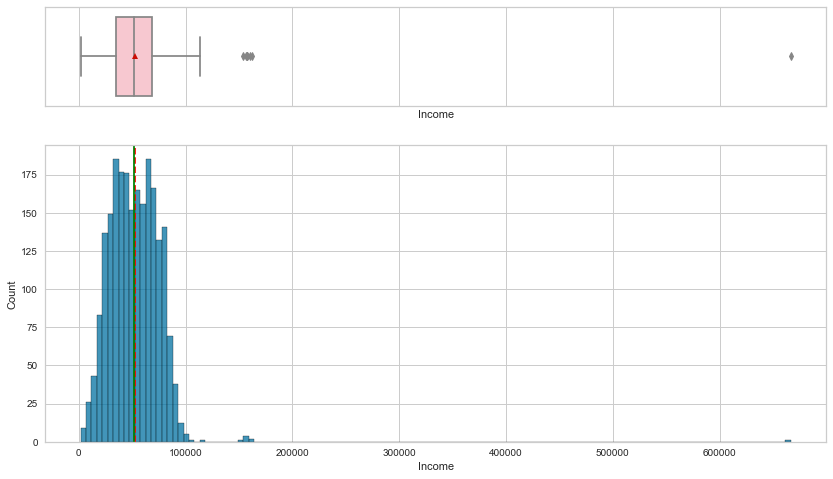

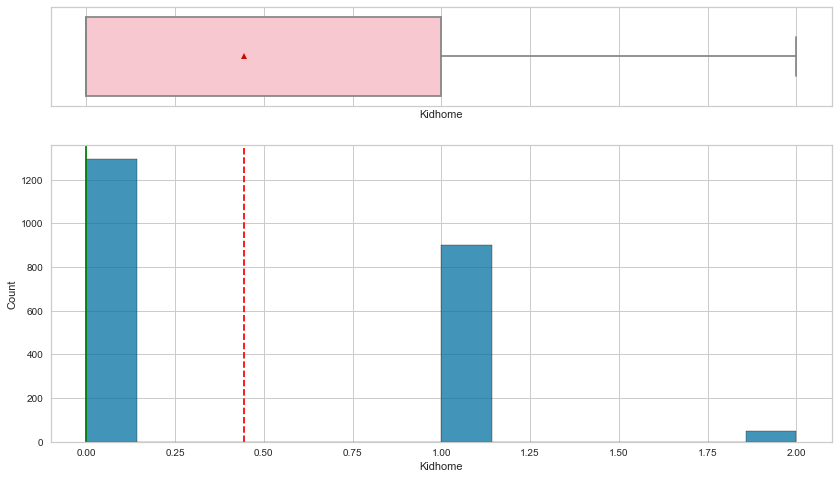

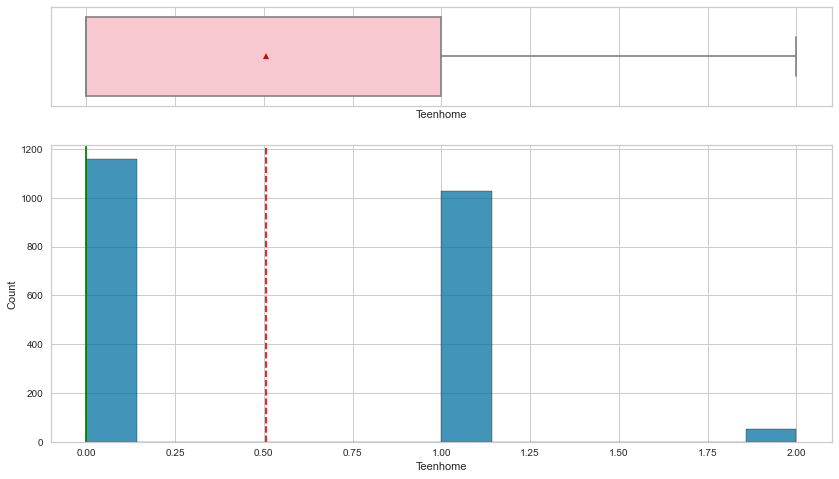

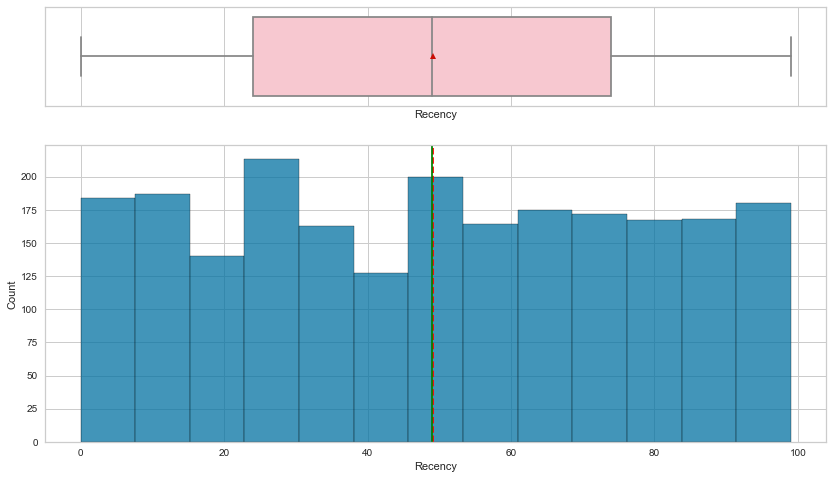

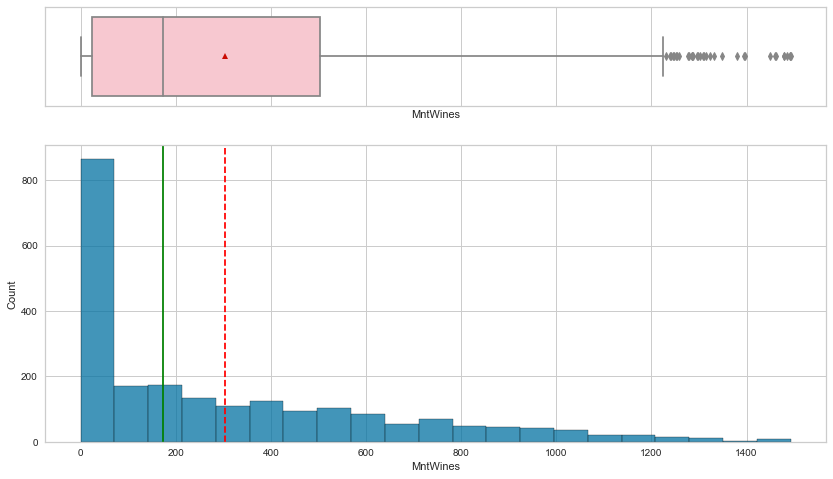

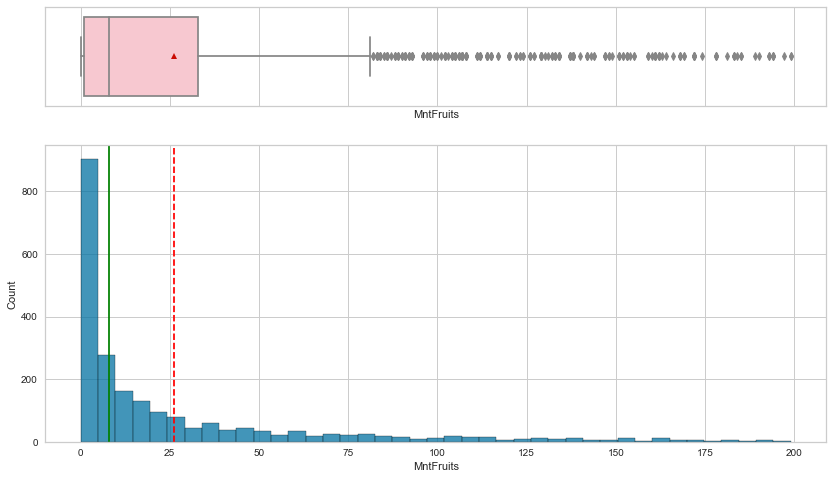

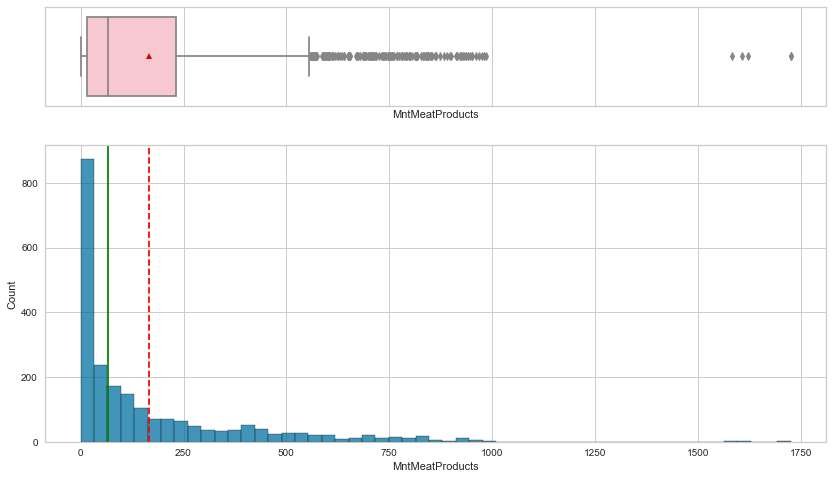

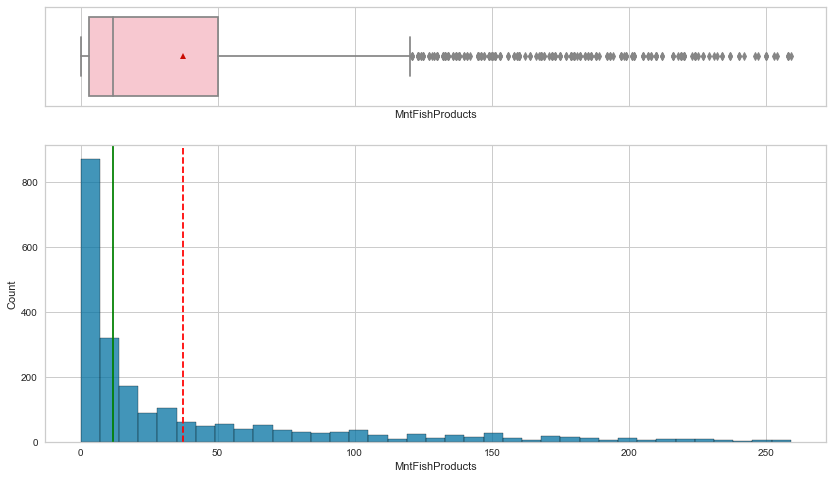

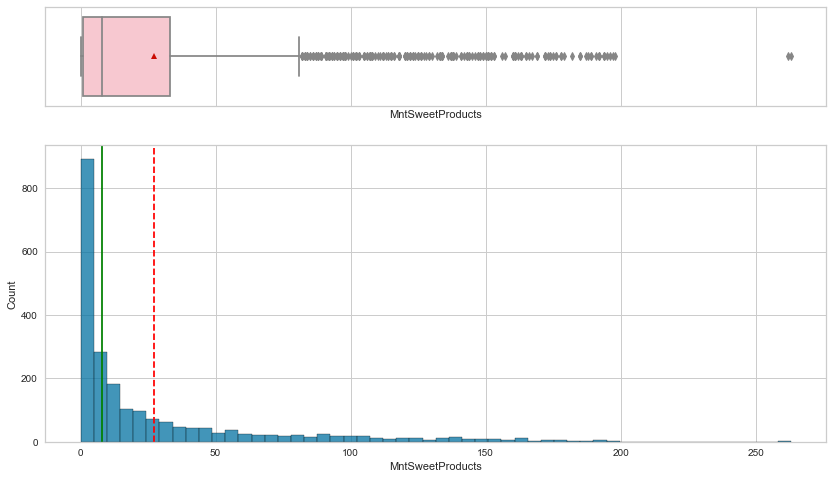

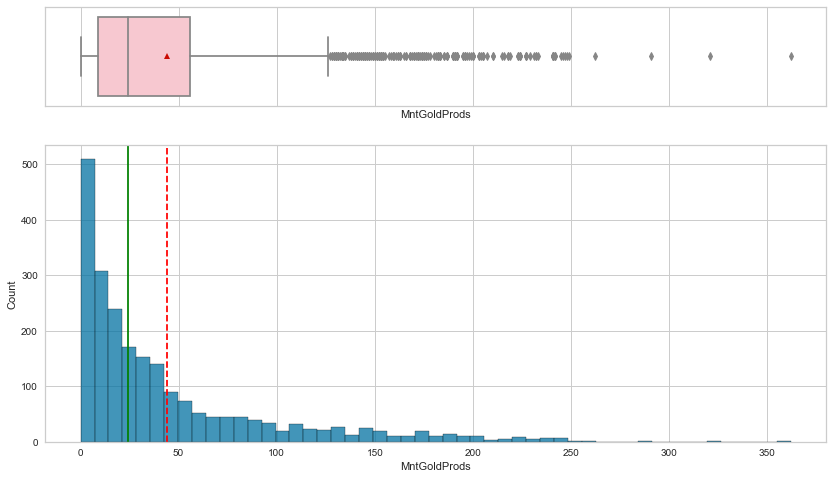

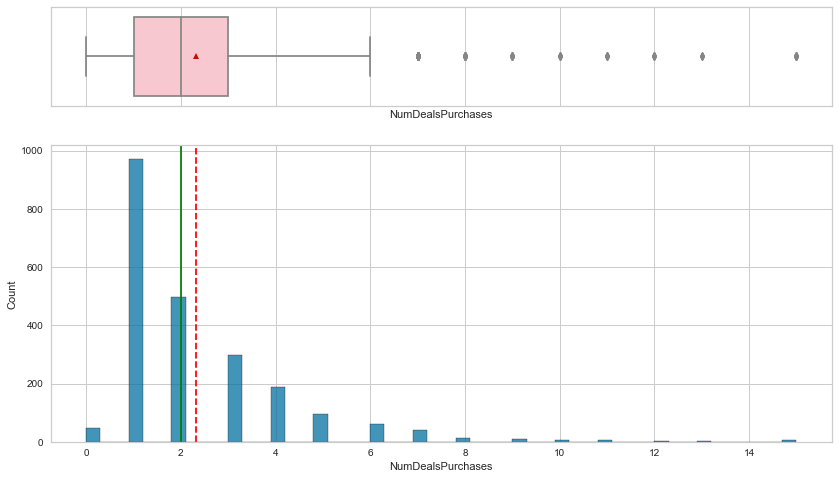

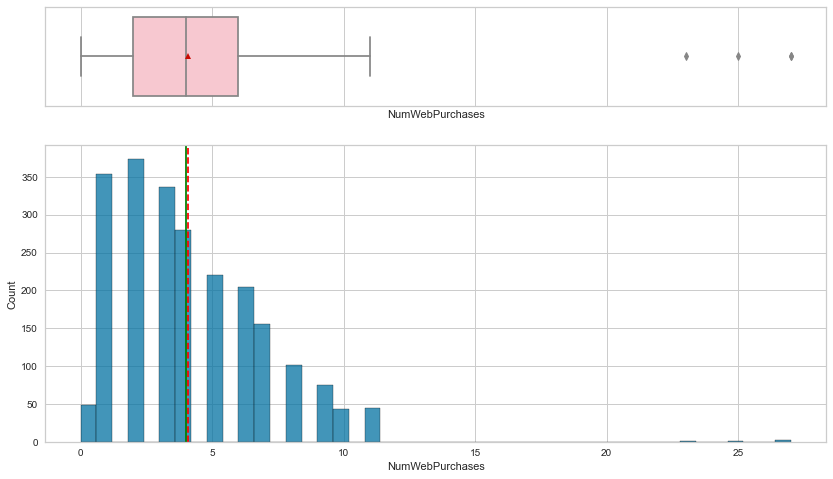

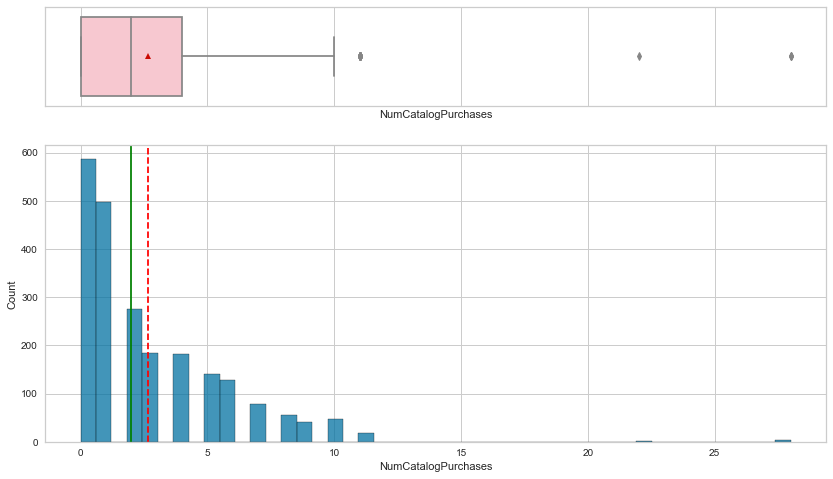

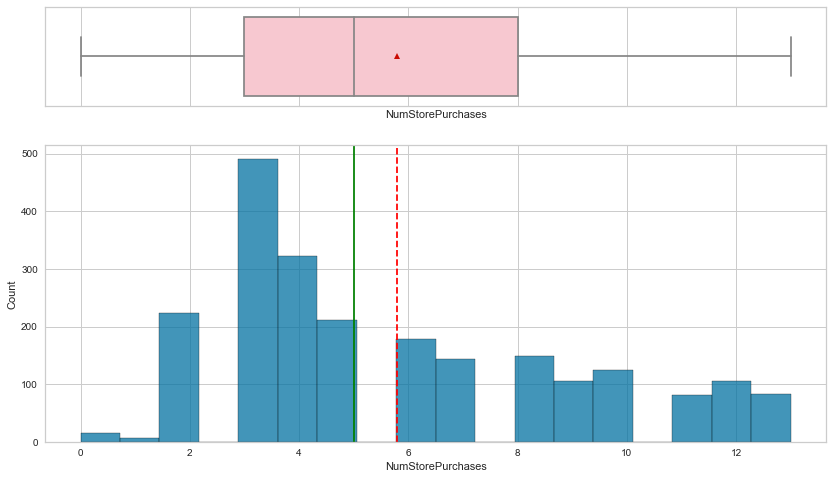

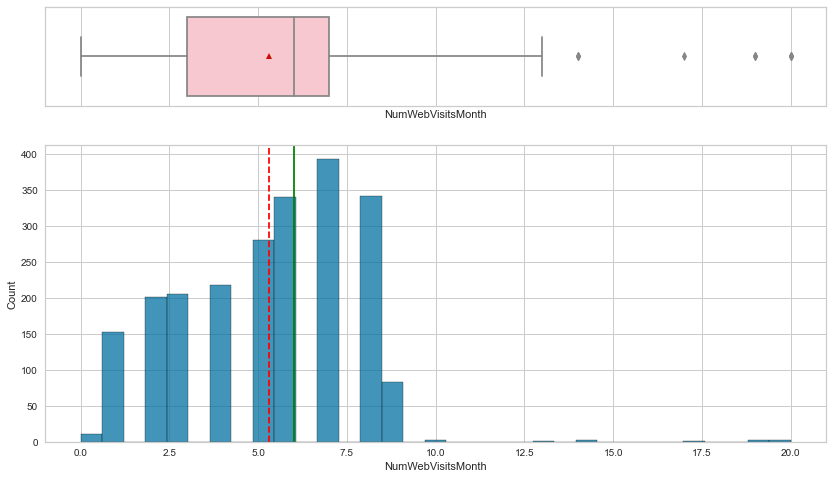

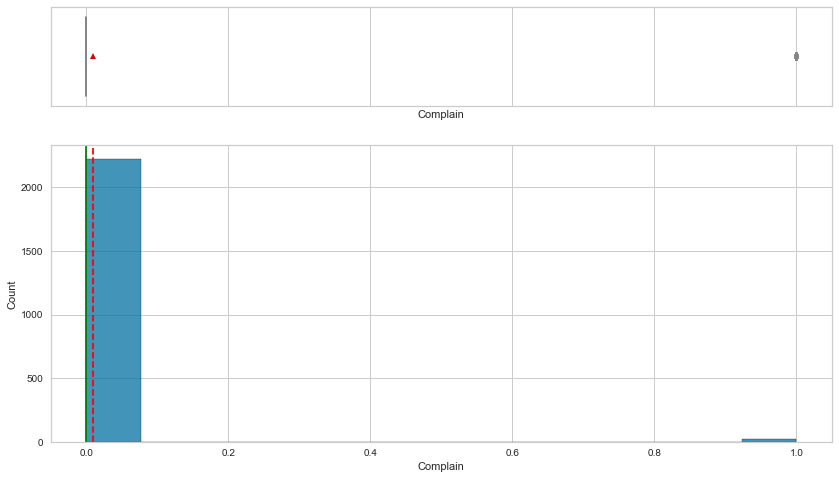

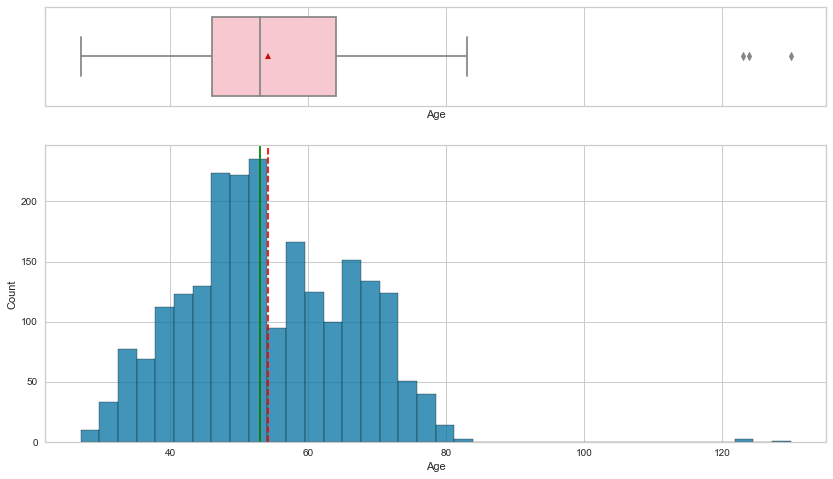

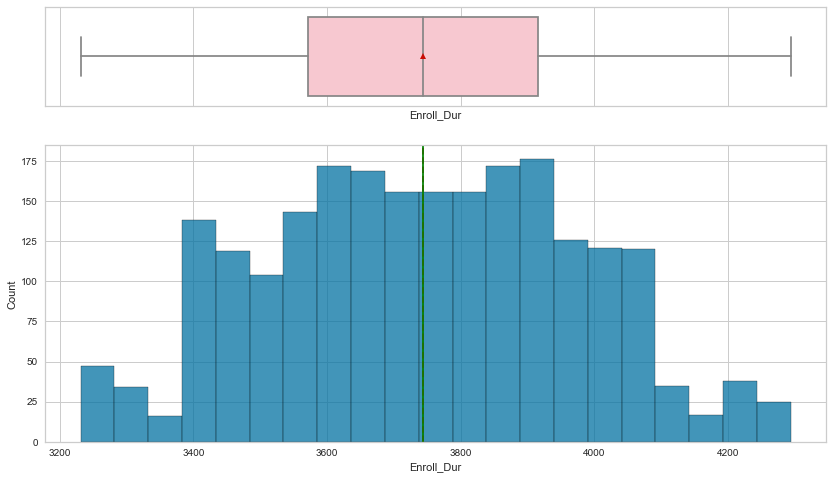

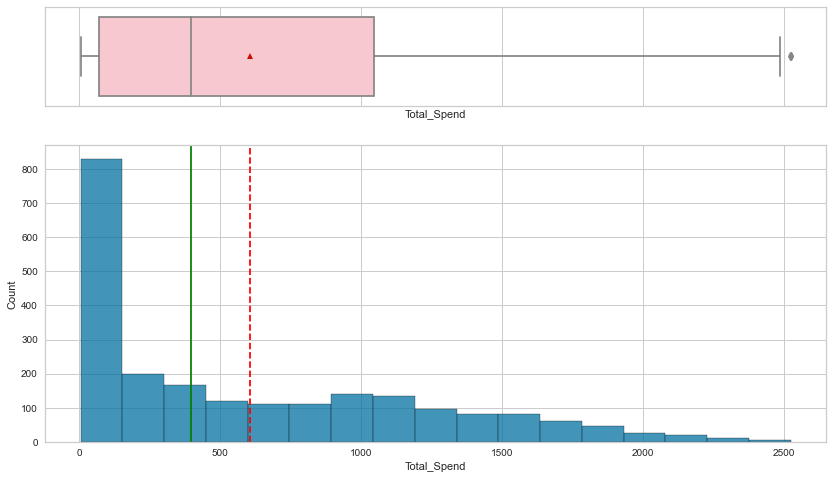

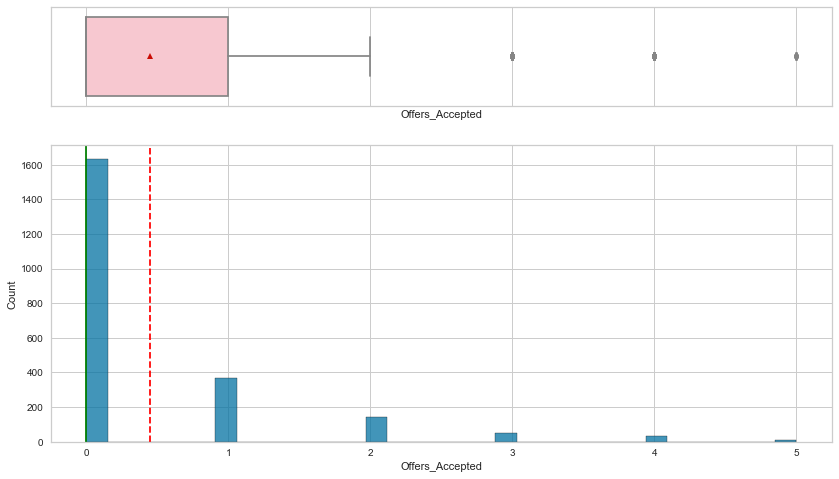

In [23]:
for col in col_num:
    hist_box(cust, col)
    print(col)

*Observations*:

* `Income` looks normally distributed with a few outliers over 100000
* Close to 58% of customers do not have a kid at home
* Close to half of the customers have a teenager at home
* `Recency` feature appears to be somewhat uniformly distributed from 0 to 100 with all customers having made a purchase within the past 100 days
* Amount spent on wines, fruits, meat products, fish products, sweet products, gold products are right skewed distributions with a mean greater than the median with several outliers 
* Number of purchases made with a discount, purchases from the company website, purchases made using a catalog are right skewed distributions and include outliers
* Number of purchases from a store is somewhat right skewed but closer to a normal distribution without apparent outliers
* Number of visits to company website is somewhat left skewed distribution with a lower mean than median but includes higher values as outliers
* A tiny fraction of the customers complained in the past 2 years
* `Age` is somewhat normally distributed with a few outliers over 100 years
* The enrollment duration of customers with the company appears to have a balanced distribution 
* `Total_Spend` is right skewed with outliers over 2500
* Over 71% of the customers did not accept an offer in any campaign

##### Categorical Columns

In [24]:
col_obj = cust.select_dtypes(exclude=[np.number]).columns.tolist()

Education


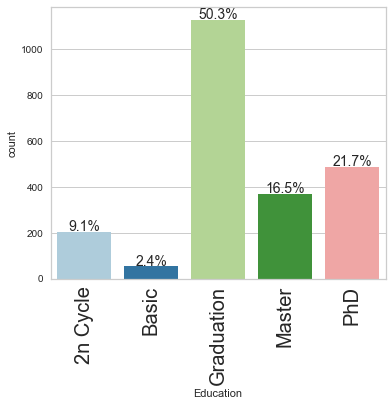

Marital_Status


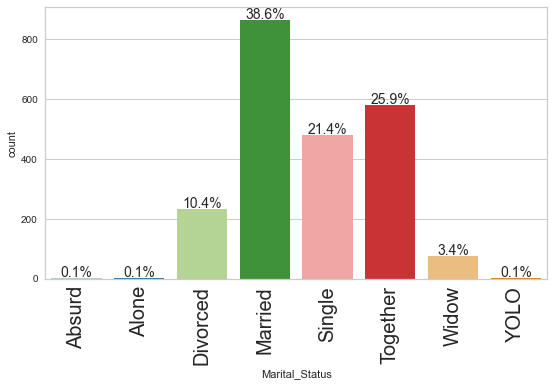

In [25]:
for col in col_obj:
    print(col)
    lab_bar(cust, col, perc=True)

*Observations*:

* Around half of the customers list their educations level as *Graduation* while ~38% have advanced degrees
* The marital status is somewhat scattered with the largest number of customers (39%) responding as being married

In [26]:
# explore how many unique attributes for each categorical variable and their associated values:
for i in col_obj:
    print("Unique values in", i, "are :")
    print(cust[i].value_counts())
    print("*" * 50)

Unique values in Education are :
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
**************************************************


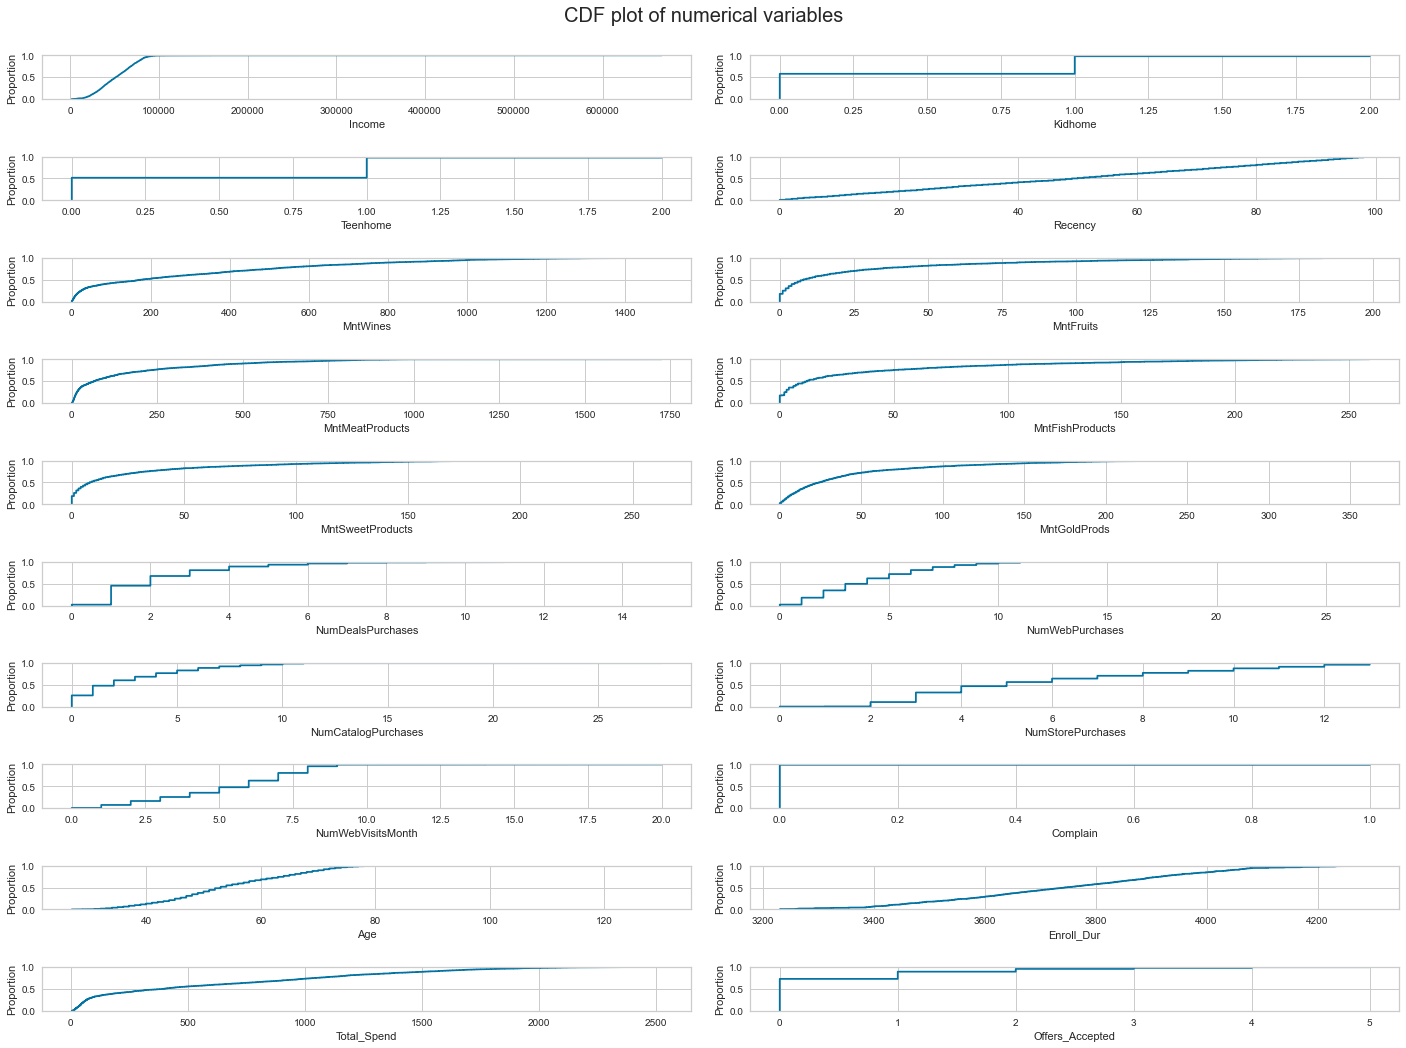

In [27]:
# Cumulative distribution of numerical variables
fig, axes = plt.subplots(10, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(10):
    sns.ecdfplot(ax=axes[ii][0], x=cust[col_num[counter]])
    counter = counter + 1
    if counter != 20:
        sns.ecdfplot(ax=axes[ii][1], x=cust[col_num[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

#### Bivariate Data Analysis

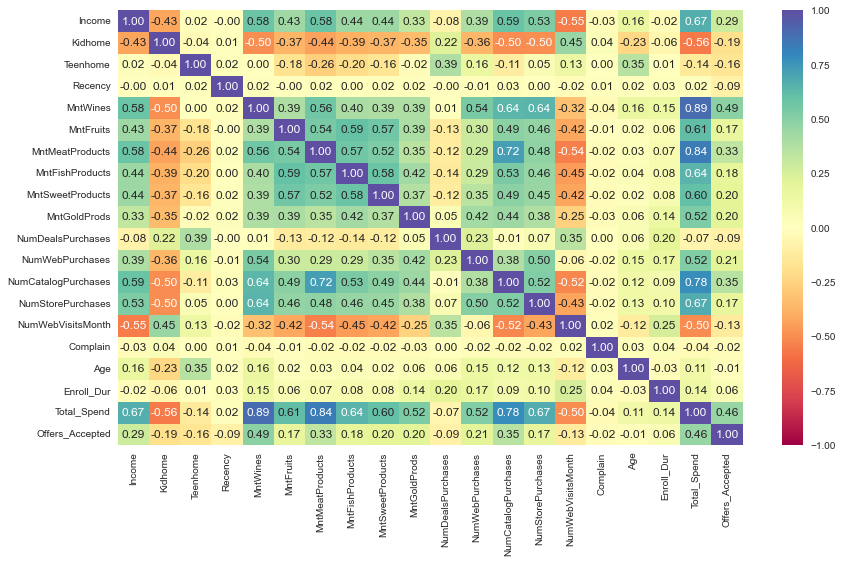

In [28]:
plt.figure(figsize=(14, 8))
sns.heatmap(cust.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

*Observations*:

* `Total_Spend` has a strong correlation with `MntWines`, `MntMeatProducts`, `MntFishProducts`, `MntFruits`, `NumCatalogPurchases`, `NumStorePurchases`, and `Income`
* Amount spent on meat products has a high correlation with the number of catalog purchases
* Number of store purchases is also highly correlated with amount spent on wines
* Because these correlations are not very high, we choose not drop any features 

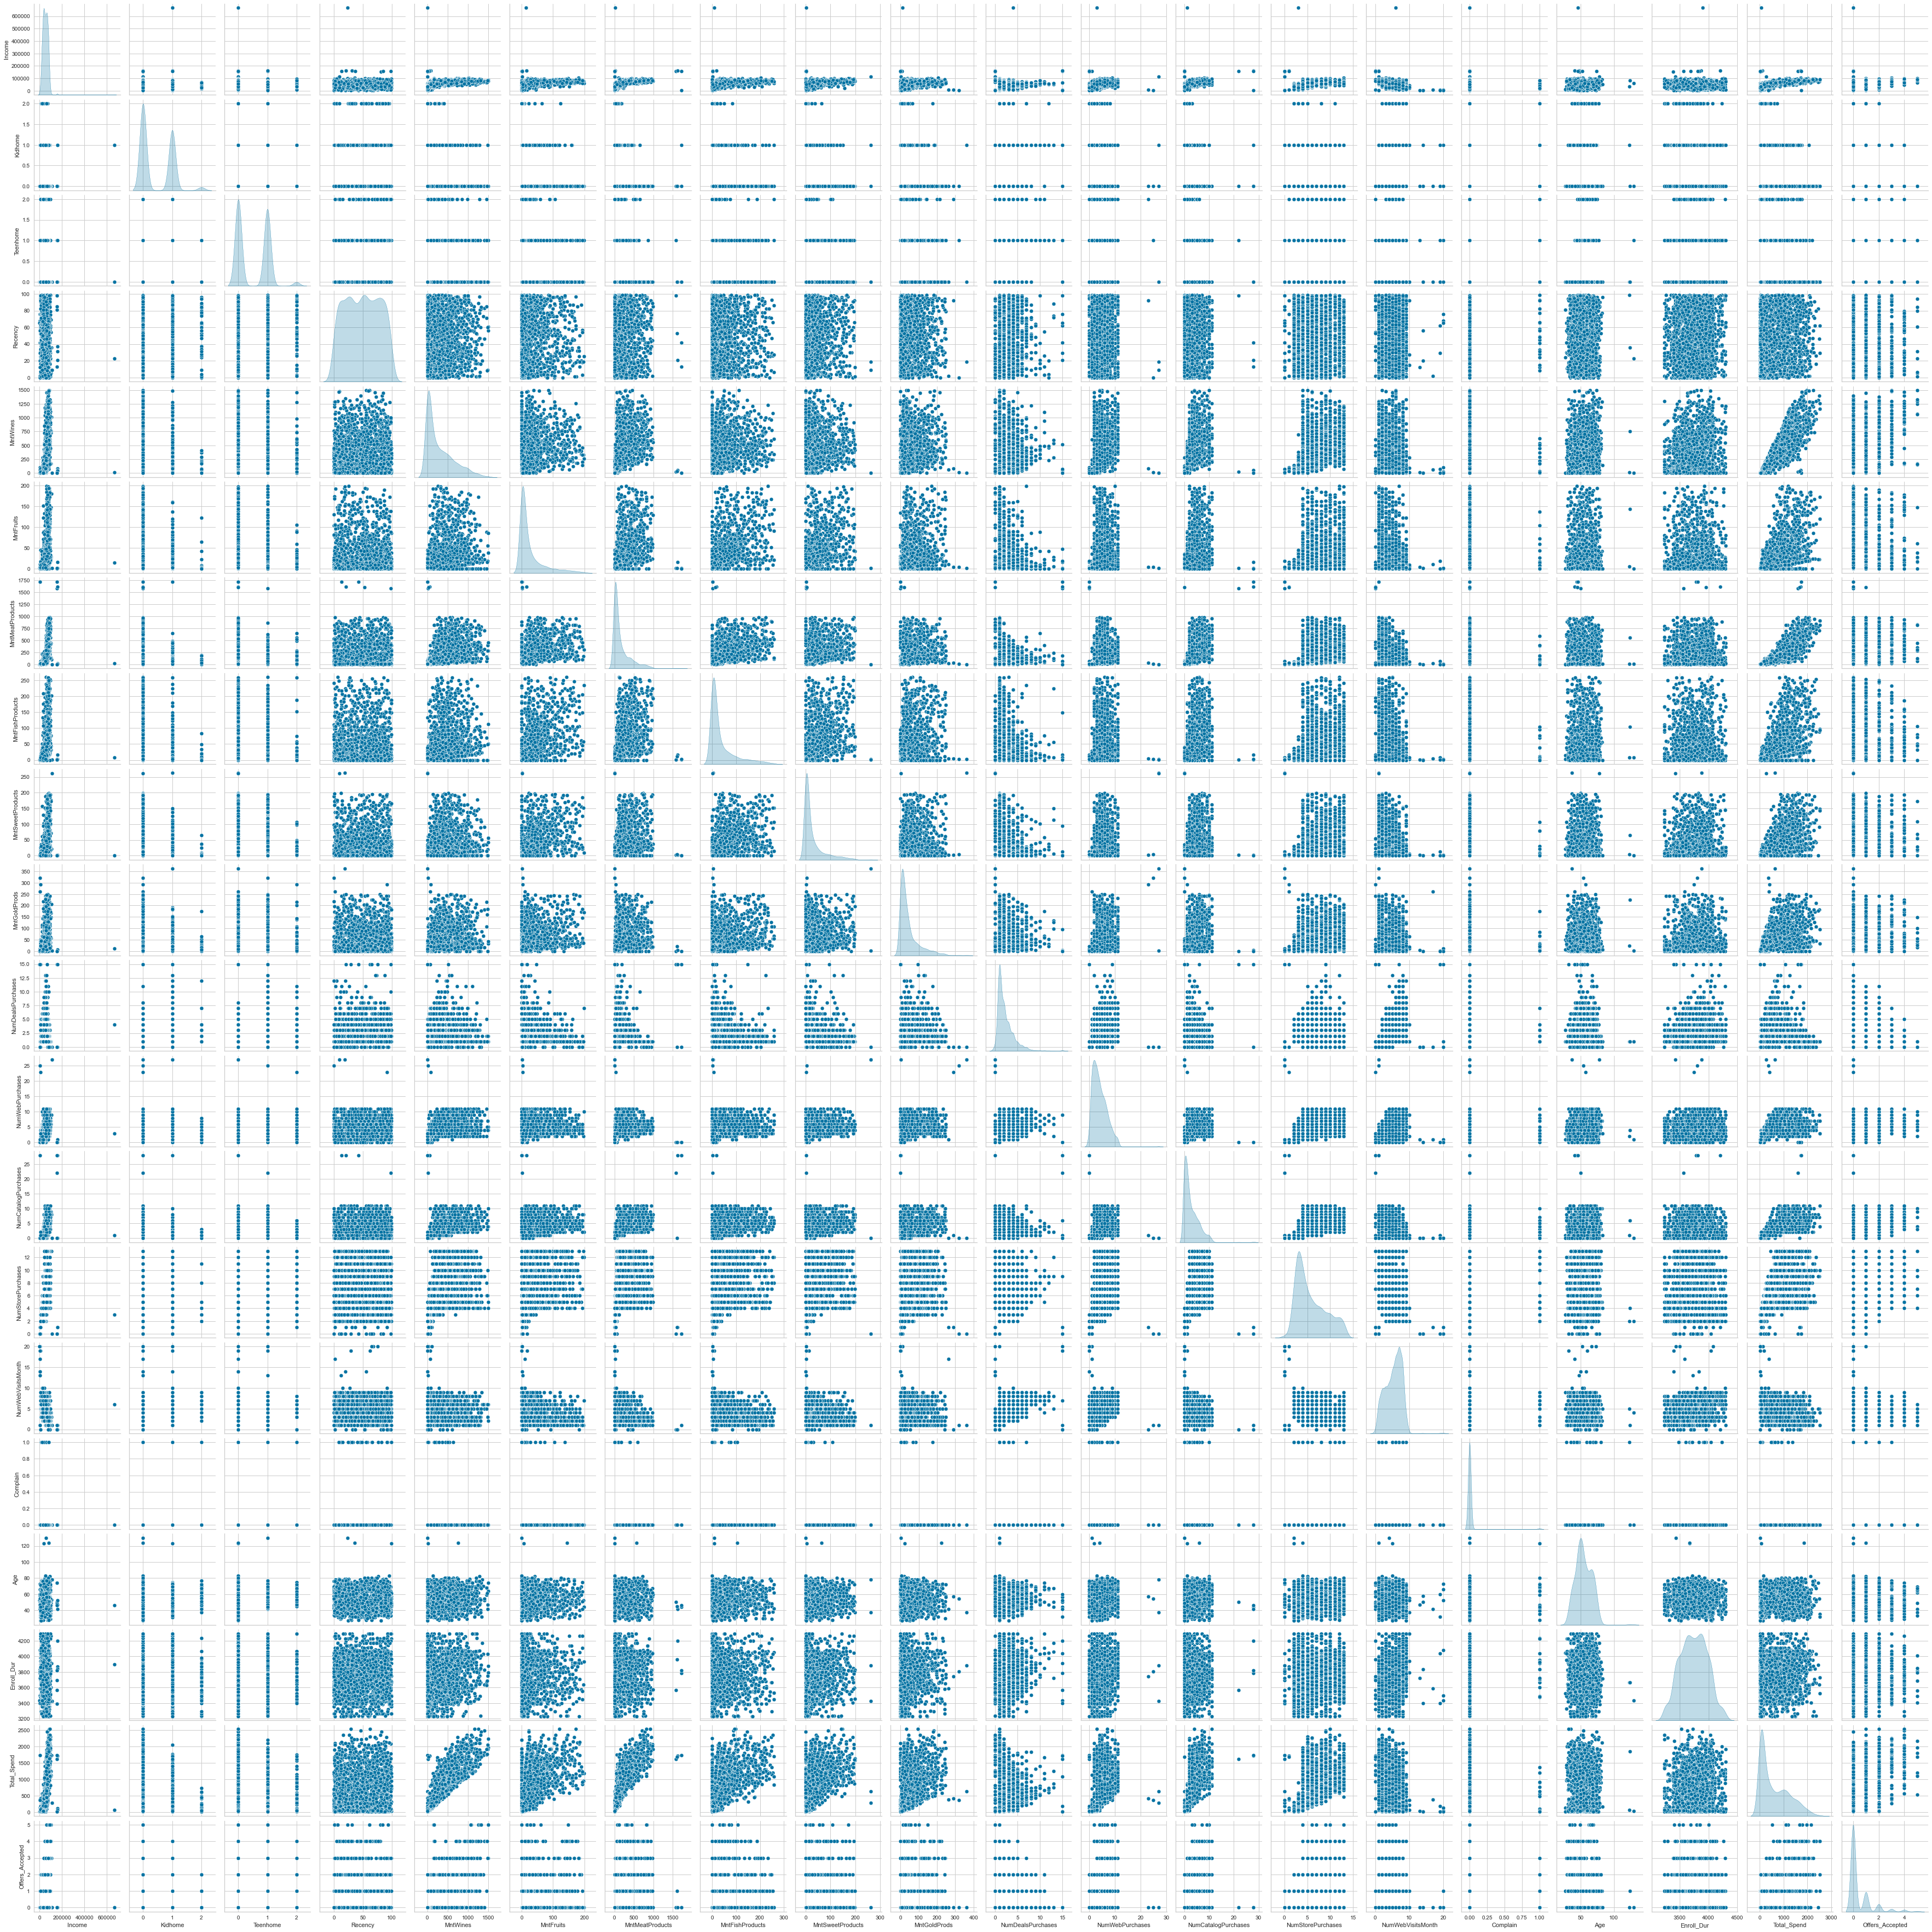

In [29]:
# Correlation between dataset numerical features
sns.pairplot(cust, diag_kind="kde")

### 6. Data Pre-processing

#### To reduce the dimensionality, we re-categorize `Education` and `Marital_Status`
* We club *Graduation*, *Basic*, *2n Cycle* into *Graduate*, while replacing *PhD* and *Master* by *Advanced*
* We specify *Married* and *Together* as *Together* and combine *Single*, *Divorced*, *Widow*, *Alone*, *Absurd*, *YOLO* into *Alone*

In [30]:
# Re-categorizing education levels
cust["Education"] = cust["Education"].replace(
    {
        "Basic": "Graduate",
        "2n Cycle": "Graduate",
        "Graduation": "Graduate",
        "Master": "Advanced",
        "PhD": "Advanced",
    }
)

In [31]:
# Re-categorizing marital status levels
cust["Marital_Status"] = cust["Marital_Status"].replace(
    {
        "Married": "Together",
        "Together": "Together",
        "Single": "Alone",
        "Divorced": "Alone",
        "Widow": "Alone",
        "Alone": "Alone",
        "Absurd": "Alone",
        "YOLO": "Alone",
    }
)

In [32]:
# since `Income` had only a few null values (24) out of 2240 total rows, we choose to drop the null value rows
cust.dropna(axis=0, inplace=True)

In [33]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Marital_Status       2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2216 non-null   int64  
 4   Teenhome             2216 non-null   int64  
 5   Recency              2216 non-null   int64  
 6   MntWines             2216 non-null   int64  
 7   MntFruits            2216 non-null   int64  
 8   MntMeatProducts      2216 non-null   int64  
 9   MntFishProducts      2216 non-null   int64  
 10  MntSweetProducts     2216 non-null   int64  
 11  MntGoldProds         2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   i

#### Outlier Treatment

We look at outlier drops on a case by case basis depending on their profile.
Dropping outliers in some colums may automatically remove outliers from other columns

`Income`

* We appear to have some discrete outliers over 100000. It will be beneficial to check if there is any pattern such that these can be removed

In [34]:
cust[cust["Income"] > 100000]

Education Marital_Status    Income  Kidhome  Teenhome  Recency  MntWines  \
124   Graduate          Alone  101970.0        0         0       69       722   
164   Advanced       Together  157243.0        0         1       98        20   
203   Advanced       Together  102160.0        0         0       54       763   
252   Graduate          Alone  102692.0        0         0        5       168   
617   Advanced       Together  162397.0        1         1       31        85   
646   Graduate       Together  105471.0        0         0       36      1009   
655   Graduate          Alone  153924.0        0         0       81         1   
687   Advanced       Together  160803.0        0         0       21        55   
1300  Advanced       Together  157733.0        1         0       37        39   
1653  Graduate       Together  157146.0        0         0       13         1   
1898  Advanced          Alone  113734.0        0         0        9         6   
2132  Advanced       Together  156924.0        0         0       85         2   
2233  Graduate       Together  666666.0        1         0       23         9   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
124          27              102               44                72   
164           2             1582                1                 2   
203          29              138               76               176   
252         148              444               32               172   
617           1               16                2                 1   
646         181              104              202                21   
655           1                1                1                 1   
687          16             1622               17                 3   
1300          1                9                2                 0   
1653          0             1725                2                 1   
1898          2                3                1               262   
2132          1                2                1                 1   
2233         14               18                8                 1   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
124            168                  0                6                    8   
164              1                 15                0                   22   
203             58                  0                7                    9   
252            148                  1                6                    9   
617              2                  0                0                    0   
646            207                  0                9                    8   
655              1                  0                0                    0   
687              4                 15                0                   28   
1300             8                  0                1                    0   
1653             1                  0                0                   28   
1898             3                  0               27                    0   
2132             1                  0                0                    0   
2233            12                  4                3                    1   

      NumStorePurchases  NumWebVisitsMonth  Complain  Age  Enroll_Dur  \
124                  13                  2         0   40        3599   
164                   0                  0         0   50        3568   
203                  10                  4         0   46        4260   
252                  13                  2         0   49        3812   
617                   1                  1         0   47        3871   
646                  13                  3         0   53        3915   
655                   0                  0         0   48        3388   
687                   1                  0         0   41        4203   
1300                  1                  1         0   52        3840   
1653                  0               

* No patterns emerge in any of the features for Income. We will keep these outliers in the analysis

`MntWines`

* We appear to have some outliers over a value of 1250 requiring a further check on if there are patterns

In [35]:
cust[cust["MntWines"] > 1250]

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
111   Advanced          Alone  68126.0        0         0       40      1332   
161   Advanced       Together  70356.0        0         0       20      1349   
424   Advanced       Together  93027.0        0         0       77      1285   
497   Advanced       Together  78642.0        0         1       83      1396   
515   Advanced          Alone  81169.0        0         0       47      1288   
523   Graduate       Together  70503.0        0         0       73      1379   
543   Advanced       Together  84169.0        0         0        9      1478   
559   Graduate       Together  87771.0        0         1       61      1492   
824   Graduate       Together  87771.0        0         1       61      1492   
826   Graduate       Together  93404.0        1         2       97      1279   
870   Advanced       Together  70123.0        0         0       27      1308   
917   Advanced       Together  84169.0        0         0        9      1478   
937   Advanced       Together  67536.0        0         1       45      1253   
987   Graduate       Together  75759.0        0         0       46      1394   
990   Graduate          Alone  85683.0        0         0        6      1296   
1001  Advanced          Alone  95169.0        0         0        1      1285   
1052  Advanced       Together  69098.0        0         0       82      1315   
1191  Advanced          Alone  67369.0        0         1       81      1298   
1458  Graduate          Alone  93790.0        0         0       16      1302   
1488  Graduate       Together  76998.0        0         1       85      1449   
1492  Graduate       Together  87679.0        0         0       62      1259   
1577  Advanced       Together  81574.0        0         0       89      1252   
1641  Advanced          Alone  64140.0        0         2       71      1459   
1749  Advanced       Together  80360.0        0         0       56      1493   
1922  Graduate          Alone  91249.0        0         0       84      1324   
1953  Advanced       Together  72335.0        0         0        2      1285   
1961  Advanced          Alone  71670.0        0         0        8      1462   
1992  Advanced          Alone  91712.0        0         0       47      1276   
2098  Advanced       Together  81929.0        1         0       60      1486   
2127  Advanced       Together  82333.0        0         0       60      1311   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
111          17              311               23                51   
161          16              249               43                16   
424          42              716               55                 0   
497           0              322               46                35   
515          20              613               80                61   
523          33              216                0                33   
543          19              403                0                19   
559          38              287               50                57   
824          38              287               50                57   
826          15              287               20                 0   
870           0              396               23                 0   
917          19              403                0                19   
937           0              447               23                71   
987          22              708               89                91   
990          17              311               45                69   
1001         21              449              106                20   
1052         22              780              145                 0   
1191          0               70               37                14   
1458         68              731               89               114   
1488         89              161               69                35   
1492        172              815 

* No patterns emerge in any of the features for MntWines. We will keep these outliers in the analysis

`MntFruits`

* We appear to have some outliers over a value of >80 requiring a further check on if there are patterns

In [36]:
cust[cust["MntFruits"] > 80]

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0     Graduate          Alone  58138.0        0         0       58       635   
29    Advanced       Together  84618.0        0         0       96       684   
45    Graduate          Alone  79941.0        0         0       72       123   
53    Graduate          Alone  82582.0        0         0       54       510   
72    Graduate       Together  65031.0        0         1       29       258   
...        ...            ...      ...      ...       ...      ...       ...   
2172  Graduate       Together  60934.0        0         1       41       224   
2185  Graduate       Together  67716.0        0         1        8       530   
2203  Graduate       Together  73807.0        0         1       88       366   
2206  Graduate       Together  61014.0        0         1       17       269   
2217  Advanced          Alone  82032.0        0         0       54       332   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0            88              546              172                88   
29          100              801               21                66   
45          164              266              227                30   
53          120              550              156                40   
72          107              291               84                37   
...         ...              ...              ...               ...   
2172        155              155              192                93   
2185        142              217               62                 9   
2203        124              156               71                78   
2206        129              495              182                43   
2217        194              377              149               125   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0               88                  3                8                   10   
29               0                  1                6                    9   
45             174                  1                2                    4   
53             241                  1                4                    9   
72              86                  4               10                    3   
...            ...                ...              ...                  ...   
2172            54                  2                6                    4   
2185            56                  4                7                    4   
2203            54                  2                5                    5   
2206            29                  4                9                    3   
2217            57                  0                4                    6   

      NumStorePurchases  NumWebVisitsMonth  Complain  Age  Enroll_Dur  \
0                     4                  7         0   66        4202   
29                   10                  2         0   58        3610   
45                    9                  1         0   47        3392   
53                    7                  1         0   46        3384   
72                   13                  7         0   64        3860   
...                 ...                ...       ...  ...         ...   
2172                 11                  4         0   48        3554   
2185                 13                  5         0   63        3662   
2203                 11                  2         0   45        3904   
2206                  4                  7         0   43        3989   
2217                  7                  1         0   75        3447   

      Total_Spend  Offers_Accepted  
0            1617                1  
29           1672                1  
45            984                0  
53           1617                3  
72            863                0  
...           ...              ...  
2172          873                0  
2185         1016                1  
2203          849               

* No specific trends in any of the features for MntFruits > 80. We will keep these outliers in the analysis

`MntMeatProducts`

* We appear to have some outliers over a value of 550 requiring a further check on if there are patterns

In [37]:
cust[cust["MntMeatProducts"] > 550]

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
21    Graduate       Together   2447.0        1         0       42         1   
29    Advanced       Together  84618.0        0         0       96       684   
51    Advanced       Together  79143.0        0         0        2       650   
76    Advanced       Together  75251.0        0         0       34       721   
77    Graduate          Alone  75825.0        0         0       40      1032   
...        ...            ...      ...      ...       ...      ...       ...   
2187  Advanced       Together  84117.0        0         0       60       611   
2190  Advanced          Alone  89616.0        0         0       36       671   
2193  Graduate       Together  82347.0        0         0       38       556   
2211  Graduate       Together  88325.0        0         0       42       519   
2213  Graduate          Alone  80617.0        0         0       42       594   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
21            1             1725                1                 1   
29          100              801               21                66   
51           37              780               27               167   
76          111              925               97                18   
77          105              779              137               105   
...         ...              ...              ...               ...   
2187         76              749               59                45   
2190         47              655              145               111   
2193         54              845              202               133   
2211         71              860               93                27   
2213         51              631               72                55   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
21               1                 15                0                   28   
29               0                  1                6                    9   
51              32                  1                6                    9   
76              18                  1                7                    6   
77              51                  0                5                    8   
...            ...                ...              ...                  ...   
2187            26                  1                7                   10   
2190            15                  1                7                    5   
2193            63                  1                7                    7   
2211            53                  1                6                    2   
2213            32                  1                4                    6   

      NumStorePurchases  NumWebVisitsMonth  Complain  Age  Enroll_Dur  \
21                    0                  1         0   44        3784   
29                   10                  2         0   58        3610   
51                   13                  3         0   59        3989   
76                    5                  5         0   51        4062   
77                    9                  4         0   47        3957   
...                 ...                ...       ...  ...         ...   
2187                  6                  2         0   67        3262   
2190                 12                  2         0   40        3880   
2193                 10                  3         0   66        4139   
2211                  9                  2         0   42        3449   
2213                  8                  2         0   28        3957   

      Total_Spend  Offers_Accepted  
21           1730                0  
29           1672                1  
51           1693                0  
76           1890                1  
77           2209                2  
...           ...              ...  
2187         1566                1  
2190         1644                1  
2193         1853               

* No patterns evident for other features when MntMeatProducts > 550. We will keep these outliers in the analysis

`MntFishProducts`

* We appear to have some outliers over a value of 120 requiring a further check on if there are patterns

In [38]:
cust[cust["MntFishProducts"] > 120]

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0     Graduate          Alone  58138.0        0         0       58       635   
12    Graduate          Alone  63033.0        0         0       82       194   
17    Graduate       Together  37760.0        0         0       20        84   
39    Advanced          Alone  48948.0        0         0       53       437   
45    Graduate          Alone  79941.0        0         0       72       123   
...        ...            ...      ...      ...       ...      ...       ...   
2188  Advanced       Together  65487.0        0         0       48       240   
2190  Advanced          Alone  89616.0        0         0       36       671   
2193  Graduate       Together  82347.0        0         0       38       556   
2206  Graduate       Together  61014.0        0         1       17       269   
2217  Advanced          Alone  82032.0        0         0       54       332   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0            88              546              172                88   
12           61              480              225               112   
17            5               38              150                12   
39            8              206              160                49   
45          164              266              227                30   
...         ...              ...              ...               ...   
2188         67              500              199                 0   
2190         47              655              145               111   
2193         54              845              202               133   
2206        129              495              182                43   
2217        194              377              149               125   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0               88                  3                8                   10   
12              30                  1                3                    4   
17              28                  2                4                    1   
39              42                  2                7                   10   
45             174                  1                2                    4   
...            ...                ...              ...                  ...   
2188           163                  3                3                    5   
2190            15                  1                7                    5   
2193            63                  1                7                    7   
2206            29                  4                9                    3   
2217            57                  0                4                    6   

      NumStorePurchases  NumWebVisitsMonth  Complain  Age  Enroll_Dur  \
0                     4                  7         0   66        4202   
12                    8                  2         0   64        3617   
17                    6                  7         0   77        4058   
39                    5                  6         0   80        3934   
45                    9                  1         0   47        3392   
...                 ...                ...       ...  ...         ...   
2188                  6                  2         0   66        3297   
2190                 12                  2         0   40        3880   
2193                 10                  3         0   66        4139   
2206                  4                  7         0   43        3989   
2217                  7                  1         0   75        3447   

      Total_Spend  Offers_Accepted  
0            1617                1  
12           1102                0  
17            317                0  
39            902                2  
45            984                0  
...           ...              ...  
2188         1169                0  
2190         1644                1  
2193         1853               

* No patterns evident for other features when MntFishProducts > 120. We will keep these outliers in the analysis

`MntSweetProducts`

* We appear to have some outliers over a value of 80 requiring a further check on if there are patterns

In [39]:
cust[cust["MntSweetProducts"] > 80]

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0     Graduate          Alone  58138.0        0         0       58       635   
12    Graduate          Alone  63033.0        0         0       82       194   
40    Graduate       Together  80011.0        0         1        3       421   
51    Advanced       Together  79143.0        0         0        2       650   
55    Advanced       Together  82384.0        0         0       55       984   
...        ...            ...      ...      ...       ...      ...       ...   
2175  Advanced       Together  79174.0        0         0        2      1074   
2190  Advanced          Alone  89616.0        0         0       36       671   
2193  Graduate       Together  82347.0        0         0       38       556   
2217  Advanced          Alone  82032.0        0         0       54       332   
2235  Graduate       Together  61223.0        0         1       46       709   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0            88              546              172                88   
12           61              480              225               112   
40           76              536               82               178   
51           37              780               27               167   
55           51              432              180               120   
...         ...              ...              ...               ...   
2175         37              518              193                92   
2190         47              655              145               111   
2193         54              845              202               133   
2217        194              377              149               125   
2235         43              182               42               118   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0               88                  3                8                   10   
12              30                  1                3                    4   
40             102                  2                8                    6   
51              32                  1                6                    9   
55             190                  1                3                   10   
...            ...                ...              ...                  ...   
2175           129                  1                5                    6   
2190            15                  1                7                    5   
2193            63                  1                7                    7   
2217            57                  0                4                    6   
2235           247                  2                9                    3   

      NumStorePurchases  NumWebVisitsMonth  Complain  Age  Enroll_Dur  \
0                     4                  7         0   66        4202   
12                    8                  2         0   64        3617   
40                    5                  4         0   43        3817   
51                   13                  3         0   59        3989   
55                   13                  1         0   68        3978   
...                 ...                ...       ...  ...         ...   
2175                  7                  2         0   48        3631   
2190                 12                  2         0   40        3880   
2193                 10                  3         0   66        4139   
2217                  7                  1         0   75        3447   
2235                  4                  5         0   56        3772   

      Total_Spend  Offers_Accepted  
0            1617                1  
12           1102                0  
40           1395                0  
51           1693                0  
55           1957                2  
...           ...              ...  
2175         2043                3  
2190         1644                1  
2193         1853               

* No patterns evident for other features when MntSweetProducts > 80. We will keep these outliers in the analysis

`MntGoldProds`

* We appear to have some outliers over a value of 125 requiring a further check on if there are patterns

In [40]:
cust[cust["MntGoldProds"] > 125]

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
18    Advanced       Together  76995.0        0         1       91      1012   
45    Graduate          Alone  79941.0        0         0       72       123   
53    Graduate          Alone  82582.0        0         0       54       510   
55    Advanced       Together  82384.0        0         0       55       984   
62    Graduate          Alone  61823.0        0         1       26       523   
...        ...            ...      ...      ...       ...      ...       ...   
2178  Graduate       Together  52914.0        0         1       32       254   
2188  Advanced       Together  65487.0        0         0       48       240   
2194  Graduate       Together  73803.0        0         1       61       833   
2198  Graduate       Together  50501.0        1         1       10       297   
2235  Graduate       Together  61223.0        0         1       46       709   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
18           80              498                0                16   
45          164              266              227                30   
53          120              550              156                40   
55           51              432              180               120   
62            7              134               37                14   
...         ...              ...              ...               ...   
2178         10               44               30                10   
2188         67              500              199                 0   
2194         80              363               52                26   
2198          0               38               13                 0   
2235         43              182               42               118   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
18             176                  2               11                    4   
45             174                  1                2                    4   
53             241                  1                4                    9   
55             190                  1                3                   10   
62             169                  4                8                    2   
...            ...                ...              ...                  ...   
2178           227                  2                7                    3   
2188           163                  3                3                    5   
2194           174                  2                9                    5   
2198           152                  7                5                    4   
2235           247                  2                9                    3   

      NumStorePurchases  NumWebVisitsMonth  Complain  Age  Enroll_Dur  \
18                    9                  5         0   74        3849   
45                    9                  1         0   47        3392   
53                    7                  1         0   46        3384   
55                   13                  1         0   68        3978   
62                   10                  7         0   71        3887   
...                 ...                ...       ...  ...         ...   
2178                  3                  7         0   52        3754   
2188                  6                  2         0   66        3297   
2194                  6                  6         0   66        4294   
2198                  4                  6         0   69        3767   
2235                  4                  5         0   56        3772   

      Total_Spend  Offers_Accepted  
18           1782                1  
45            984                0  
53           1617                3  
55           1957                2  
62            884                0  
...           ...              ...  
2178          575                1  
2188         1169                0  
2194         1528               

* No patterns evident for other features when MntGoldProds > 125. We will keep these outliers in the analysis

`NumDealsPurchases`

* We appear to have some outliers over a value of 6 requiring a further check on if there are patterns

In [41]:
cust[cust["NumDealsPurchases"] > 6]

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
21    Graduate       Together   2447.0        1         0       42         1   
24    Graduate       Together  40689.0        0         1       69       270   
49    Advanced       Together  72550.0        1         1       39       826   
54    Graduate       Together  66373.0        1         1       57       328   
69    Graduate       Together  74854.0        1         2       90       856   
...        ...            ...      ...      ...       ...      ...       ...   
2090  Advanced          Alone  53367.0        1         1        2       229   
2144  Graduate          Alone  65333.0        0         1       58       654   
2198  Graduate       Together  50501.0        1         1       10       297   
2226  Graduate       Together  63777.0        1         1       87       457   
2236  Advanced       Together  64014.0        2         1       56       406   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
21            1             1725                1                 1   
24            3               27               39                 6   
49           50              317               50                38   
54            9              124               12                24   
69           59              487               58                29   
...         ...              ...              ...               ...   
2090          7              140               10                 3   
2144          7               92                0                15   
2198          0               38               13                 0   
2226          5              106               15                17   
2236          0               30                0                 0   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
21               1                 15                0                   28   
24              99                  7                7                    1   
49              38                  9                5                    2   
54             109                  7                4                    2   
69              73                  7                2                    5   
...            ...                ...              ...                  ...   
2090            11                  7                5                    1   
2144            30                  7                9                    4   
2198           152                  7                5                    4   
2226            53                  8               11                    1   
2236             8                  7                8                    2   

      NumStorePurchases  NumWebVisitsMonth  Complain  Age  Enroll_Dur  \
21                    0                  1         0   44        3784   
24                    5                  8         0   72        3859   
49                   12                  8         0   69        4078   
54                   10                  3         0   45        3596   
69                    5                  5         0   53        3720   
...                 ...                ...       ...  ...         ...   
2090                  8                  7         0   49        3693   
2144                  8                  6         0   50        3554   
2198                  4                  6         0   69        3767   
2226                  6                  8         0   44        3853   
2236                  5                  7         0   77        3292   

      Total_Spend  Offers_Accepted  
21           1730                0  
24            444                0  
49           1319                0  
54            606                0  
69           1562                0  
...           ...              ...  
2090          400                1  
2144          798                2  
2198          500               

* No patterns evident for other features when NumDealsPurchases > 6. We will keep these outliers in the analysis

`NumWebPurchases`

* We appear to have some outliers over a value of 20 requiring a further check on if there are patterns

In [42]:
cust[cust["NumWebPurchases"] > 20]

Education Marital_Status    Income  Kidhome  Teenhome  Recency  MntWines  \
1806  Advanced          Alone    7144.0        0         2       92        81   
1898  Advanced          Alone  113734.0        0         0        9         6   
1975  Graduate       Together    4428.0        0         1        0        16   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
1806          4               33                5                 2   
1898          2                3                1               262   
1975          4               12                2                 4   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1806           291                  0               23                    1   
1898             3                  0               27                    0   
1975           321                  0               25                    0   

      NumStorePurchases  NumWebVisitsMonth  Complain  Age  Enroll_Dur  \
1806                  1                  0         0   57        3743   
1898                  0                  1         0   78        3423   
1975                  0                  1         0   54        3806   

      Total_Spend  Offers_Accepted  
1806          416                0  
1898          277                0  
1975          359                0

* No patterns evident for other features when NumWebPurchases > 20. We will keep these outliers in the analysis

`NumCatalogPurchases`

* We appear to have some outliers over a value of 10 requiring a further check on if there are patterns

In [43]:
cust[cust["NumCatalogPurchases"] > 10]

Education Marital_Status    Income  Kidhome  Teenhome  Recency  MntWines  \
21    Graduate       Together    2447.0        1         0       42         1   
104   Graduate       Together   87195.0        0         0       35       217   
164   Advanced       Together  157243.0        0         1       98        20   
288   Graduate          Alone   79946.0        0         0       19       395   
586   Graduate          Alone   79800.0        0         0       65      1060   
591   Advanced       Together   92163.0        0         0       25       817   
627   Graduate       Together   70971.0        0         1       28      1001   
636   Graduate          Alone   84574.0        0         0       72       387   
687   Advanced       Together  160803.0        0         0       21        55   
764   Graduate          Alone   75127.0        0         0       92       203   
777   Advanced       Together   74250.0        0         0       90       680   
934   Graduate          Alone   75127.0        0         0       92       203   
984   Graduate       Together   80763.0        0         0       17       674   
1212  Graduate       Together   77044.0        0         1       12       625   
1452  Graduate          Alone   73892.0        0         0       40       703   
1465  Advanced          Alone   49476.0        0         1       29       386   
1492  Graduate       Together   87679.0        0         0       62      1259   
1653  Graduate       Together  157146.0        0         0       13         1   
1745  Graduate       Together   81795.0        0         0       74       324   
1828  Advanced       Together   80739.0        0         0       92       674   
1906  Advanced       Together   60491.0        0         1       81       637   
1940  Advanced       Together   73356.0        0         0       56      1050   
1958  Graduate          Alone   96843.0        0         0       60       448   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
21            1             1725                1                 1   
104          76              690               50                26   
164           2             1582                1                 2   
288         183              565              166               141   
586          21              530               32                 0   
591         183              797              106               163   
627          17              572               93               125   
636          20              713               38                54   
687          16             1622               17                 3   
764          35              305               46                17   
777          11              392               75                 0   
934          35              305               46                17   
984         168              108              192                42   
1212         38              242               50                34   
1452        102              601                0                58   
1465         23               95               54                41   
1492        172              815               97               148   
1653          0             1725                2                 1   
1745        132              693               27               118   
1828         92              736               39                 0   
1906         47              237               12                19   
1940         14              322                0                14   
1958         71              951               40                17   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
21               1                 15                0                   28   
104             38                  1                3                   11   
164              1                 15                0                   22   
288             28                  1  

* No patterns evident for other features when NumCatalogPurchases > 10. We will keep these outliers in the analysis

`NumWebVisitsMonth`

* We appear to have some outliers over a value of 13 requiring a further check on if there are patterns

In [44]:
cust[cust["NumWebVisitsMonth"] > 13]

Education Marital_Status  Income  Kidhome  Teenhome  Recency  MntWines  \
9     Advanced       Together  5648.0        1         1       68        28   
774   Advanced       Together  6835.0        0         1       76       107   
981   Graduate          Alone  4861.0        0         0       20         2   
1042  Graduate          Alone  8028.0        0         0       62        73   
1245  Graduate          Alone  1730.0        0         0       65         1   
1328  Advanced          Alone  6560.0        0         0        2        67   
1524  Graduate          Alone  3502.0        1         0       56         2   
1846  Advanced       Together  4023.0        1         1       29         5   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
9             0                6                1                 1   
774           2               12                2                 2   
981           1                1                1                 0   
1042         18               66                7                12   
1245          1                3                1                 1   
1328         11               26                4                 3   
1524          1                1                0                 0   
1846          0                1                1                 1   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
9               13                  1                1                    0   
774             12                  0                0                    0   
981              1                  0                0                    0   
1042             2                 15                0                    1   
1245             1                 15                0                    0   
1328           262                  0                1                    0   
1524             1                  0                0                    0   
1846             1                 15                0                    0   

      NumStorePurchases  NumWebVisitsMonth  Complain  Age  Enroll_Dur  \
9                     0                 20         0   73        3499   
774                   1                 20         0   66        4077   
981                   0                 14         0   58        3398   
1042                  0                 19         0   32        4040   
1245                  0                 20         0   52        3433   
1328                  1                 17         0   41        3590   
1524                  0                 14         0   50        3833   
1846                  0                 19         0   60        3397   

      Total_Spend  Offers_Accepted  
9              49                1  
774           137                0  
981             6                0  
1042          178                0  
1245            8                0  
1328          373                0  
1524            5                0  
1846            9                0

* No patterns evident for other features when NumWebVisitsMonth > 13. We will keep these outliers in the analysis

`Age`

* We appear to have some outliers over a value of 100 requiring a further check on if there are patterns

In [45]:
cust[cust["Age"] > 100]

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
192  Graduate          Alone  36640.0        1         0       99        15   
239  Graduate          Alone  60182.0        0         1       23         8   
339  Advanced       Together  83532.0        0         0       36       755   

     MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
192          6                8                7                 4   
239          0                5                7                 0   
339        144              562              104                64   

     MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
192            25                  1                2                    1   
239             2                  1                1                    0   
339           224                  1                4                    6   

     NumStorePurchases  NumWebVisitsMonth  Complain  Age  Enroll_Dur  \
192                  2                  5         1  123        3667   
239                  2                  4         0  130        3434   
339                  4                  1         0  124        3667   

     Total_Spend  Offers_Accepted  
192           65                0  
239           22                0  
339         1853                1

* We drop these outliers since it is not certain if these are actual customers or if there is an error in data compilation. We keep customers only under the age of 100 

In [46]:
cust = cust[cust["Age"] < 100]

`Total_Spend`

* We appear to have some outliers over a value of 2500 requiring a further check on if there are patterns

In [47]:
cust[cust["Total_Spend"] > 2500]

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
1179  Advanced          Alone  90638.0        0         0       29      1156   
1492  Graduate       Together  87679.0        0         0       62      1259   
1572  Advanced          Alone  90638.0        0         0       29      1156   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
1179        120              915               94               144   
1492        172              815               97               148   
1572        120              915               94               144   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1179            96                  1                3                    4   
1492            33                  1                7                   11   
1572            96                  1                3                    4   

      NumStorePurchases  NumWebVisitsMonth  Complain  Age  Enroll_Dur  \
1179                 10                  1         0   32        3527   
1492                 10                  4         0   35        3728   
1572                 10                  1         0   32        3527   

      Total_Spend  Offers_Accepted  
1179         2525                1  
1492         2524                4  
1572         2525                2

* No patterns evident for other features when Total_Spend > 2500. We will keep these outliers in the analysis

`Offers_Accepted`

* We appear to have some outliers over a value of 2 requiring a further check on if there are patterns

In [48]:
cust[cust["Offers_Accepted"] > 2]

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
15    Advanced          Alone  82800.0        0         0       23      1006   
53    Graduate          Alone  82582.0        0         0       54       510   
60    Advanced          Alone  75777.0        0         0       12       712   
67    Graduate          Alone  88194.0        0         1       19       688   
87    Graduate          Alone  50388.0        0         1        3       292   
...        ...            ...      ...      ...       ...      ...       ...   
2168  Graduate       Together  90000.0        0         0       91       675   
2171  Graduate          Alone  65706.0        0         0       77       918   
2175  Advanced       Together  79174.0        0         0        2      1074   
2193  Graduate       Together  82347.0        0         0       38       556   
2221  Advanced          Alone  75777.0        0         0       12       712   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
15           22              115               59                68   
53          120              550              156                40   
60           26              538               69                13   
67           14              309              201                24   
87            6               37                0                 3   
...         ...              ...              ...               ...   
2168        144              133               94               192   
2171         10              129               13                 0   
2175         37              518              193                92   
2193         54              845              202               133   
2221         26              538               69                13   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
15              45                  1                7                    6   
53             241                  1                4                    9   
60              80                  1                3                    6   
67              38                  1               11                   10   
87              34                  4                6                    1   
...            ...                ...              ...                  ...   
2168           241                  1                4                    8   
2171           129                  1               11                    3   
2175           129                  1                5                    6   
2193            63                  1                7                    7   
2221            80                  1                3                    6   

      NumStorePurchases  NumWebVisitsMonth  Complain  Age  Enroll_Dur  \
15                   12                  3         0   77        3973   
53                    7                  1         0   46        3384   
60                   11                  1         0   41        3839   
67                   10                  5         0   44        3493   
87                    6                  7         0   66        3423   
...                 ...                ...       ...  ...         ...   
2168                  5                  1         0   39        3579   
2171                 12                  7         0   53        3757   
2175                  7                  2         0   48        3631   
2193                 10                  3         0   66        4139   
2221                 11                  1         0   41        3839   

      Total_Spend  Offers_Accepted  
15           1315                3  
53           1617                3  
60           1438                3  
67           1274                3  
87            372                3  
...           ...              ...  
2168         1479                3  
2171         1199                4  
2175         2043               

* No patterns evident for other features when Offers_Accepted > 2. We will keep these outliers in the analysis

In [49]:
# convert all categorical features to numerical using one-hot encoding
cust = pd.get_dummies(data=cust, drop_first=False)

In [50]:
cust.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   Complain  Age  Enroll_Dur  Total_Spend  Offers_Accepted  \
0         0   66        4202         1617                1   
1         0   69        3356           27                0   
2         0   58        3703          776                0   
3         0   39        3296           53                0   
4         0   42        3552          422                0   

   Education_Advanced  Education_Graduate  Marital_Status_Alone  \
0                   0                   1                     1   
1                   0                   1                     1   
2                   0                   1                     0   
3                   0                   1                     0   
4                   1                   0                     0   

   Marital_Status_Together  
0                        0  
1                        0  
2                        1  
3                        1  
4                        1

In [51]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = cust[col_num].copy()
subset_scaled = scaler.fit_transform(subset)

# Creating a dataframe from the scaled data
subset_scaled_cust = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_cust.head()

Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  0.234435 -0.823208 -0.929307  0.310773  0.978107   1.552498   
1 -0.234084  1.039532  0.908545 -0.380424 -0.872266  -0.637451   
2  0.769733 -0.823208 -0.929307 -0.795142  0.358351   0.570796   
3 -1.016592  1.039532 -0.929307 -0.795142 -0.872266  -0.561936   
4  0.240593  1.039532 -0.929307  1.554927 -0.391881   0.419766   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0         1.690807         2.454109          1.484200      0.852974   
1        -0.718020        -0.650863         -0.633818     -0.733466   
2        -0.178264         1.339972         -0.146917     -0.036980   
3        -0.655569        -0.504747         -0.585128     -0.752813   
4        -0.218411         0.152777         -0.000847     -0.559344   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0           0.350656         1.427316             2.504247          -0.555456   
1          -0.169104        -1.126455            -0.571168          -1.170837   
2          -0.688863         1.427316            -0.229456           1.290688   
3          -0.169104        -0.761631            -0.912881          -0.555456   
4           1.390175         0.332842             0.112257           0.059925   

   NumWebVisitsMonth  Complain       Age  Enroll_Dur  Total_Spend  \
0           0.692198 -0.095498  1.018785    1.973525     1.676723   
1          -0.132699 -0.095498  1.275248   -1.665655    -0.962927   
2          -0.545148 -0.095498  0.334882   -0.172989     0.280531   
3           0.279749 -0.095498 -1.289387   -1.923752    -0.919763   
4          -0.132699 -0.095498 -1.032923   -0.822535    -0.307165   

   Offers_Accepted  
0         0.617576  
1        -0.502666  
2        -0.502666  
3        -0.502666  
4        -0.502666

### 7. K-means Clustering

In [52]:
# Creating a copy of the original and scaled datasets for Kmeans
cust_KM = cust.copy()
subset_scaled_cust_KM = subset_scaled_cust.copy()

#### Plotting the Elbow curve

Number of Clusters: 1 	Average Distortion: 4.211117889709487
Number of Clusters: 2 	Average Distortion: 3.5043695332202796
Number of Clusters: 3 	Average Distortion: 3.2852058284560854
Number of Clusters: 4 	Average Distortion: 3.1548145487281376
Number of Clusters: 5 	Average Distortion: 3.0888788965732363
Number of Clusters: 6 	Average Distortion: 3.0252873340046285
Number of Clusters: 7 	Average Distortion: 2.955887356689313
Number of Clusters: 8 	Average Distortion: 2.9139707704511797
Number of Clusters: 9 	Average Distortion: 2.8518192559328406


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

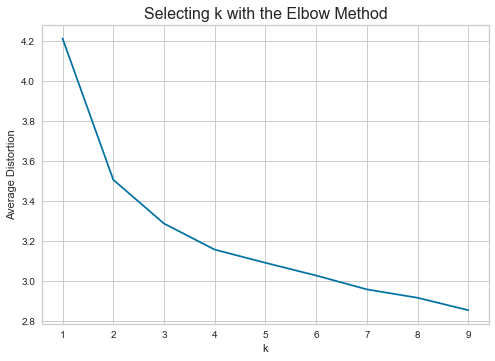

In [53]:
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_cust_KM)
    prediction = model.predict(subset_scaled_cust_KM)
    distortion = (
        sum(
            np.min(
                cdist(subset_scaled_cust_KM, model.cluster_centers_, "euclidean"),
                axis=1,
            )
        )
        / subset_scaled_cust_KM.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=16)

**A reasonable value of k from the elbow curve seems to be 4**

#### Plotting the Silhoutte scores

For n_clusters = 2, silhouette score is 0.2933044187933965
For n_clusters = 3, silhouette score is 0.21340218037248124
For n_clusters = 4, silhouette score is 0.13401988344051033
For n_clusters = 5, silhouette score is 0.14141669232293047
For n_clusters = 6, silhouette score is 0.13822152848335584
For n_clusters = 7, silhouette score is 0.13952666093579738
For n_clusters = 8, silhouette score is 0.13390520438699785
For n_clusters = 9, silhouette score is 0.13127750730525817


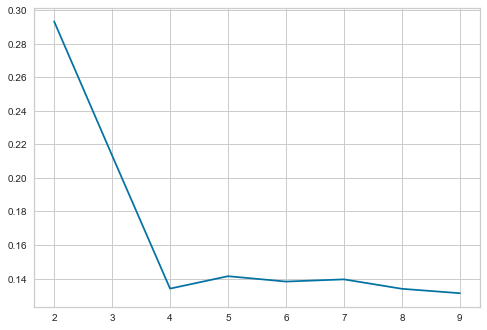

In [54]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_cust_KM))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_cust_KM, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

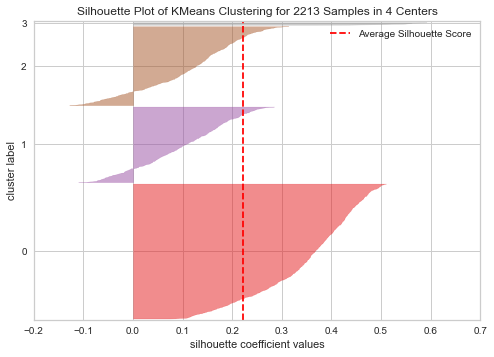

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2213 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [55]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_cust_KM)
visualizer.show()

In [56]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(subset_scaled_cust_KM)

KMeans(n_clusters=4, random_state=0)

In [57]:
# adding kmeans cluster labels to the original & scaled dataframes
cust_KM["K_means_segments"] = kmeans.labels_
subset_scaled_cust_KM["K_means_segments"] = kmeans.labels_

In [58]:
cust_KM.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   Complain  Age  Enroll_Dur  Total_Spend  Offers_Accepted  \
0         0   66        4202         1617                1   
1         0   69        3356           27                0   
2         0   58        3703          776                0   
3         0   39        3296           53                0   
4         0   42        3552          422                0   

   Education_Advanced  Education_Graduate  Marital_Status_Alone  \
0                   0                   1                     1   
1                   0                   1                     1   
2                   0                   1                     0   
3                   0                   1                     0   
4                   1                   0                     0   

   Marital_Status_Together  K_means_segments  
0                        0                 1  
1                        0                 3  
2                        1                 2  
3                        1                 0  
4                        1                 0

In [59]:
subset_scaled_cust_KM.head()

Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  0.234435 -0.823208 -0.929307  0.310773  0.978107   1.552498   
1 -0.234084  1.039532  0.908545 -0.380424 -0.872266  -0.637451   
2  0.769733 -0.823208 -0.929307 -0.795142  0.358351   0.570796   
3 -1.016592  1.039532 -0.929307 -0.795142 -0.872266  -0.561936   
4  0.240593  1.039532 -0.929307  1.554927 -0.391881   0.419766   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0         1.690807         2.454109          1.484200      0.852974   
1        -0.718020        -0.650863         -0.633818     -0.733466   
2        -0.178264         1.339972         -0.146917     -0.036980   
3        -0.655569        -0.504747         -0.585128     -0.752813   
4        -0.218411         0.152777         -0.000847     -0.559344   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0           0.350656         1.427316             2.504247          -0.555456   
1          -0.169104        -1.126455            -0.571168          -1.170837   
2          -0.688863         1.427316            -0.229456           1.290688   
3          -0.169104        -0.761631            -0.912881          -0.555456   
4           1.390175         0.332842             0.112257           0.059925   

   NumWebVisitsMonth  Complain       Age  Enroll_Dur  Total_Spend  \
0           0.692198 -0.095498  1.018785    1.973525     1.676723   
1          -0.132699 -0.095498  1.275248   -1.665655    -0.962927   
2          -0.545148 -0.095498  0.334882   -0.172989     0.280531   
3           0.279749 -0.095498 -1.289387   -1.923752    -0.919763   
4          -0.132699 -0.095498 -1.032923   -0.822535    -0.307165   

   Offers_Accepted  K_means_segments  
0         0.617576                 1  
1        -0.502666                 3  
2        -0.502666                 2  
3        -0.502666                 0  
4        -0.502666                 0

#### Cluster Profiling

In [60]:
cluster_profile_KM = cust_KM.groupby("K_means_segments").mean()
cluster_profile_KM

Income   Kidhome  Teenhome    Recency    MntWines  \
K_means_segments                                                            
0                 29508.560284  0.856383  0.017730  48.728723   34.203901   
1                 77762.040146  0.041971  0.138686  49.529197  617.943431   
2                 59466.199262  0.193727  0.915129  47.957565  507.542435   
3                 43134.971377  0.656530  0.960644  49.796064   75.658318   

                  MntFruits  MntMeatProducts  MntFishProducts  \
K_means_segments                                                
0                  6.374113        27.223404         9.773050   
1                 68.056569       467.397810       100.304745   
2                 26.894834       151.981550        35.195572   
3                  4.987478        27.953488         6.676208   

                  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
K_means_segments                                                      
0                         6.622340     17.815603           1.907801   
1                        70.791971     76.837591           1.250000   
2                        26.872694     67.214022           3.725092   
3                         4.890877     15.368515           2.443649   

                  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
K_means_segments                                                            
0                        2.269504             0.524823           3.125887   
1                        5.036496             6.133212           8.339416   
2                        6.747232             3.343173           8.182657   
3                        2.413238             0.792487           3.719141   

                  NumWebVisitsMonth  Complain        Age   Enroll_Dur  \
K_means_segments                                                        
0                          7.015957  0.014184  44.540780  3738.943262   
1                          2.768248  0.003650  54.145985  3742.549270   
2                          5.695572  0.011070  58.287823  3811.850554   
3                          5.753131  0.007156  59.570662  3681.627907   

                  Total_Spend  Offers_Accepted  Education_Advanced  \
K_means_segments                                                     
0                  102.012411         0.221631            0.294326   
1                 1401.332117         1.027372            0.341241   
2                  815.701107         0.420664            0.457565   
3                  135.534884         0.137746            0.436494   

                  Education_Graduate  Marital_Status_Alone  \
K_means_segments                                             
0                           0.705674              0.351064   
1                           0.658759              0.386861   
2                           0.542435              0.352399   
3                           0.563506              0.327370   

                  Marital_Status_Together  
K_means_segments                           
0                                0.648936  
1                                0.613139  
2                                0.647601  
3                                0.672630

In [61]:
cluster_profile_scaled_KM = subset_scaled_cust_KM.groupby("K_means_segments").mean()
cluster_profile_scaled_KM

Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
K_means_segments                                                                
0                -0.902876  0.772011 -0.896721 -0.009641 -0.803459  -0.502175   
1                 1.014005 -0.745028 -0.674423  0.018023  0.927529   1.050485   
2                 0.287198 -0.462345  0.752565 -0.036292  0.600152   0.014369   
3                -0.361564  0.399736  0.836215  0.027246 -0.680532  -0.537079   

                  MntMeatProducts  MntFishProducts  MntSweetProducts  \
K_means_segments                                                       
0                       -0.623347        -0.508892         -0.496942   
1                        1.340179         1.144628          1.065270   
2                       -0.066827        -0.044561         -0.003946   
3                       -0.620090        -0.565454         -0.539094   

                  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
K_means_segments                                                     
0                    -0.504871          -0.217025        -0.663309   
1                     0.637017          -0.558923         0.346157   
2                     0.450831           0.727529         0.970275   
3                    -0.552215           0.061487        -0.610871   

                  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
K_means_segments                                                              
0                           -0.733543          -0.824413           0.698780   
1                            1.182916           0.779742          -1.053183   
2                            0.229524           0.731508           0.154189   
3                           -0.642078          -0.641874           0.177928   

                  Complain       Age  Enroll_Dur  Total_Spend  Offers_Accepted  
K_means_segments                                                                
0                 0.054387 -0.815717   -0.018374    -0.838395        -0.254386  
1                -0.056933  0.005411   -0.002862     1.318680         0.648239  
2                 0.021478  0.359487    0.295246     0.346441        -0.031420  
3                -0.019886  0.469155   -0.264923    -0.782742        -0.348357

In [62]:
cluster_profile_KM["count_in_each_segment"] = (
    cust_KM.groupby("K_means_segments")["Income"].count().values
)

cluster_profile_KM

Income   Kidhome  Teenhome    Recency    MntWines  \
K_means_segments                                                            
0                 29508.560284  0.856383  0.017730  48.728723   34.203901   
1                 77762.040146  0.041971  0.138686  49.529197  617.943431   
2                 59466.199262  0.193727  0.915129  47.957565  507.542435   
3                 43134.971377  0.656530  0.960644  49.796064   75.658318   

                  MntFruits  MntMeatProducts  MntFishProducts  \
K_means_segments                                                
0                  6.374113        27.223404         9.773050   
1                 68.056569       467.397810       100.304745   
2                 26.894834       151.981550        35.195572   
3                  4.987478        27.953488         6.676208   

                  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
K_means_segments                                                      
0                         6.622340     17.815603           1.907801   
1                        70.791971     76.837591           1.250000   
2                        26.872694     67.214022           3.725092   
3                         4.890877     15.368515           2.443649   

                  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
K_means_segments                                                            
0                        2.269504             0.524823           3.125887   
1                        5.036496             6.133212           8.339416   
2                        6.747232             3.343173           8.182657   
3                        2.413238             0.792487           3.719141   

                  NumWebVisitsMonth  Complain        Age   Enroll_Dur  \
K_means_segments                                                        
0                          7.015957  0.014184  44.540780  3738.943262   
1                          2.768248  0.003650  54.145985  3742.549270   
2                          5.695572  0.011070  58.287823  3811.850554   
3                          5.753131  0.007156  59.570662  3681.627907   

                  Total_Spend  Offers_Accepted  Education_Advanced  \
K_means_segments                                                     
0                  102.012411         0.221631            0.294326   
1                 1401.332117         1.027372            0.341241   
2                  815.701107         0.420664            0.457565   
3                  135.534884         0.137746            0.436494   

                  Education_Graduate  Marital_Status_Alone  \
K_means_segments                                             
0                           0.705674              0.351064   
1                           0.658759              0.386861   
2                           0.542435              0.352399   
3                           0.563506              0.327370   

                  Marital_Status_Together  count_in_each_segment  
K_means_segments                                                  
0                                0.648936                    564  
1                                0.613139                    548  
2                                0.647601                    542  
3                                0.672630                    559

In [63]:
# let's display cluster profiles
cluster_profile_KM.style.highlight_max(color="lightgreen", axis=0)

**Let's plot the variable values for each cluster**

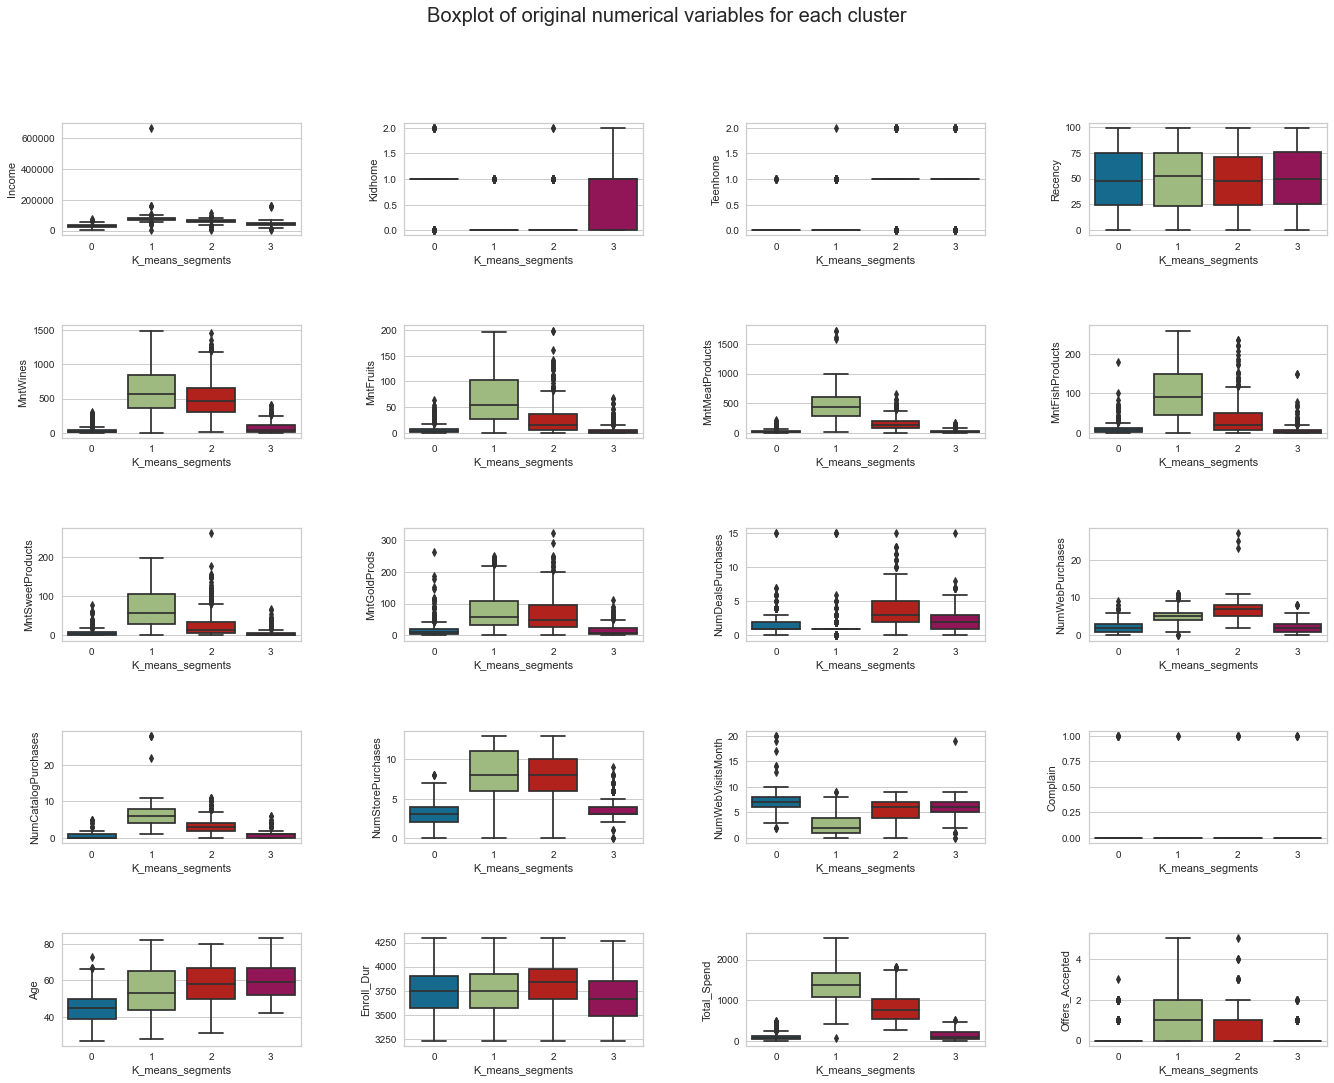

In [64]:
fig, axes = plt.subplots(round(len(col_num)/4), 4, figsize=(20, 16)) 

fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

counter = 0
for name in col_num:    
    i, j = divmod(counter, 4)
    sns.boxplot(ax=axes[i,j], y=cust_KM[name], x=cust_KM["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=5.0)

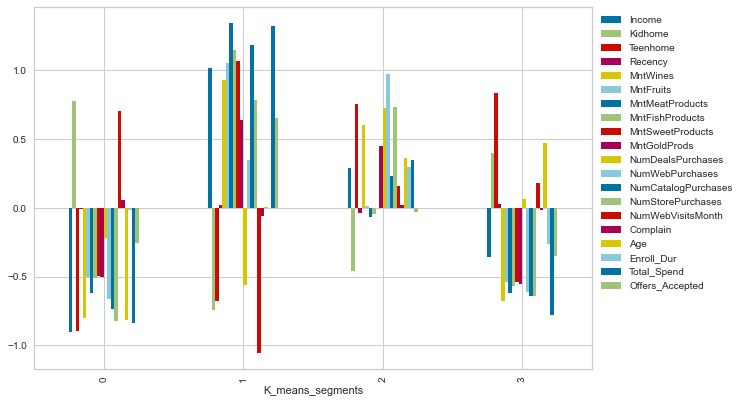

In [65]:
subset_scaled_cust_KM.groupby("K_means_segments").mean().plot.bar(figsize=(10, 6.667))

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

#### Insights from k-means clustering

- **Cluster 0**:
    - There are 564 data points in this cluster
    - The average income of this set of customers was much below the customer population average
    - This group of customers had the highest number of kids at home
    - The customers in this group had fewer than average number of teenagers for the overall customer population
    - This group spent little on wines on average
    - This group spent very little on fruits, meat and fish products, sweets and gold products compared to the overall population
    - Customers in this group made fewer purchases on deals than the average customer in the population
    - The number of web purchases by customers in this cluster were lower than the population average
    - Very few catalog based purchases were made by this cluster of customers
    - These customers made a smaller number of store purchases than the average customer in the population
    - This group had the highest number of company webpage visits in the last month
    - These customers were younger on average compared to the average customer in the population
    - This group had a low total spend
    - Customers in this cluster accepted a few offers on average 


- **Cluster 1**:
    - There are 548 data points in this cluster
    - This group of customers had the highest income on average
    - This group of customers had the fewest kids at home
    - The customers in this group had fewer teenagers than the average customer in the population
    - This group spent almost 2x on wines on average compared with the overall population average
    - This group spent the highest on fruits, meat and fish products, sweets and gold products compared to the overall population average
    - This group made very few purchases on deals 
    - The customers in this set made somewhat higher number of web purchases than an average customer in the overall population 
    - Catalogs were used heavily by this set of customers to make purchases
    - These customers made a larger number of store purchases than the average customer in the population
    - This group had the lowest number of company webpage visits in the last month
    - These customers were around the same age as the average customer in the population
    - This group had the highest overall spend
    - Customers accepted 1 offer on average which was higher than the overall population average
    

- **Cluster 2**:
    - There are 542 data points in this cluster
    - The average income of this cluster of customers was somewhat higher than the population average
    - This group of customers had fewer than average number of kids when compared to the overall customer population
    - The customers in this group had higher than the average number of teenagers that the overall population had
    - This group spent much higher on wines on average compared with the overall population average
    - This group spent moderate amount on fruits, meat and fish products, sweets and gold products somewhat close to the overall population average
    - This set of customers made the most number of purchases on deals on average compared to the overall customer population 
    - These customers made the highest number of purchases on the web on average 
    - The customers in this group made more purchases based on catalogs than the average customer in the overall population
    - These customers made a larger number of store purchases than the average customer in the population
    - This group visited the company website last month similar to an average customer in th broader population
    - These customers were older on average compared to the average customer in the population
    - This group had a higher spend compared to the average spend of the entire customer population
    - Customers accepted an average number of offers similar to the average customer in the overall population
    
    
- **Cluster 3**:
    - There are 559 data points in this cluster
    - The average income in this group was lower than that of the average customer in the overall population 
    - Customers in this group had more kids at home than the average customer in the overall population 
    - The customers in this group had close to 1 teenager at home which was higher than the average of the customer population       - This group spent below average amount on wines compared with the overall population
    - This set of customers spent much below the overall population average on fruits, meat and fish products, sweets and gold products
    - Customers in this group on average made purchases on deals similar to the average customer in the population
    - The number of web purchases by customers in this cluster were lower than the population average
    - Very few catalog based purchases were made by this cluster of customers
    - These customers made a lower number of store purchases than the average customer in the population
    - This group on average visited the company website around the same number of times as the average customer in the overall population 
    - These customers were older on average compared to the average customer in the population
    - This group had a low total spend
    - Customers in this cluster accepted a few offers on average
    
An interesting observation is that Cluster 0 and Cluster 3 are similar is customer attributes and could potentially be combined together. 
    
The relationship between features within clusters 0, 1, 2, 3 are consistent with the bivariate analysis from the prior EDA.

### 8. Hierarchical Clustering

In [66]:
# Creating a copy of the original and scaled datasets for Hierarchical Clustering
cust_HC = cust.copy()
subset_scaled_cust_HC = subset_scaled_cust.copy()

**We start with checking cophenetic correlation for each linkage method**

In [67]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_cust_HC, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_cust_HC))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.75085219696146.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7466756621738838.
Cophenetic correlation for Euclidean distance and average linkage is 0.85000206018108.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.7833485606000199.
Cophenetic correlation for Chebyshev distance and single linkage is 0.5778567388249125.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.6269657740260702.
Cophenetic correlation for Chebyshev distance and average linkage is 0.744937691043803.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.66539642193518.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7738590257339952.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.4560229603182834.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8031676292646036.
Cophenetic correlati

In [68]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1].capitalize()
    )
)

Highest cophenetic correlation is 0.85000206018108, which is obtained with Euclidean distance and Average linkage.


**Let's explore different linkage methods with Euclidean distance only as it seems to perform best for different linkage methods**

In [69]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_cust_HC, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_cust_HC))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.75085219696146.
Cophenetic correlation for complete linkage is 0.7466756621738838.
Cophenetic correlation for average linkage is 0.85000206018108.
Cophenetic correlation for centroid linkage is 0.817400512338346.
Cophenetic correlation for ward linkage is 0.487246657390583.
Cophenetic correlation for weighted linkage is 0.7833485606000199.


In [70]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.85000206018108, which is obtained with average linkage.


* We see that the cophenetic correlation is maximum with Euclidean distance and average linkage

**Let's plot the silhouette scores for different linkage types for multiple clusters to identify an appropriate number of clusters**

For n_clusters =2, linkage = single, silhouette score is 0.7632445389040718
For n_clusters =2, linkage = complete, silhouette score is 0.7632445389040718
For n_clusters =2, linkage = average, silhouette score is 0.7632445389040718
For n_clusters =2, linkage = ward, silhouette score is 0.2484554676456339
For n_clusters =3, linkage = single, silhouette score is 0.5237508053123474
For n_clusters =3, linkage = complete, silhouette score is 0.5792027725439189
For n_clusters =3, linkage = average, silhouette score is 0.5792027725439189
For n_clusters =3, linkage = ward, silhouette score is 0.2023932539110542
For n_clusters =4, linkage = single, silhouette score is 0.5066279370337754
For n_clusters =4, linkage = complete, silhouette score is 0.31297921976816523
For n_clusters =4, linkage = average, silhouette score is 0.5228153774017829
For n_clusters =4, linkage = ward, silhouette score is 0.2158925373083538
For n_clusters =5, linkage = single, silhouette score is 0.5071826349858809
For n_cl

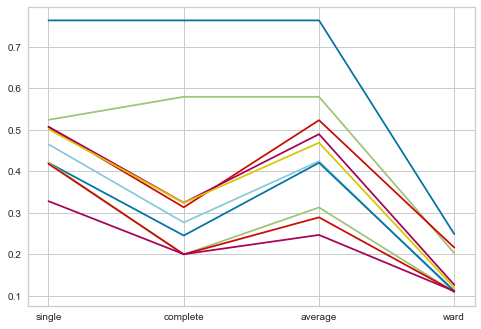

In [71]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "ward"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

cluster_list = list(range(2, 12))

for n_clusters in cluster_list:
    sil_score = []
    for lm in linkage_methods:
        clusterer = AgglomerativeClustering(
            n_clusters=n_clusters, affinity="euclidean", linkage=lm
        )
        preds = clusterer.fit_predict((subset_scaled_cust_HC))
        score = silhouette_score(subset_scaled_cust_HC, preds)
        sil_score.append(score)
        print(
            "For n_clusters ={}, linkage = {}, silhouette score is {}".format(
                n_clusters, lm, score
            )
        )
    plt.plot(linkage_methods, sil_score)

* We see that the silhouette scores are highest for 2 clusters 

**Let's see the dendrograms for the different linkage methods**

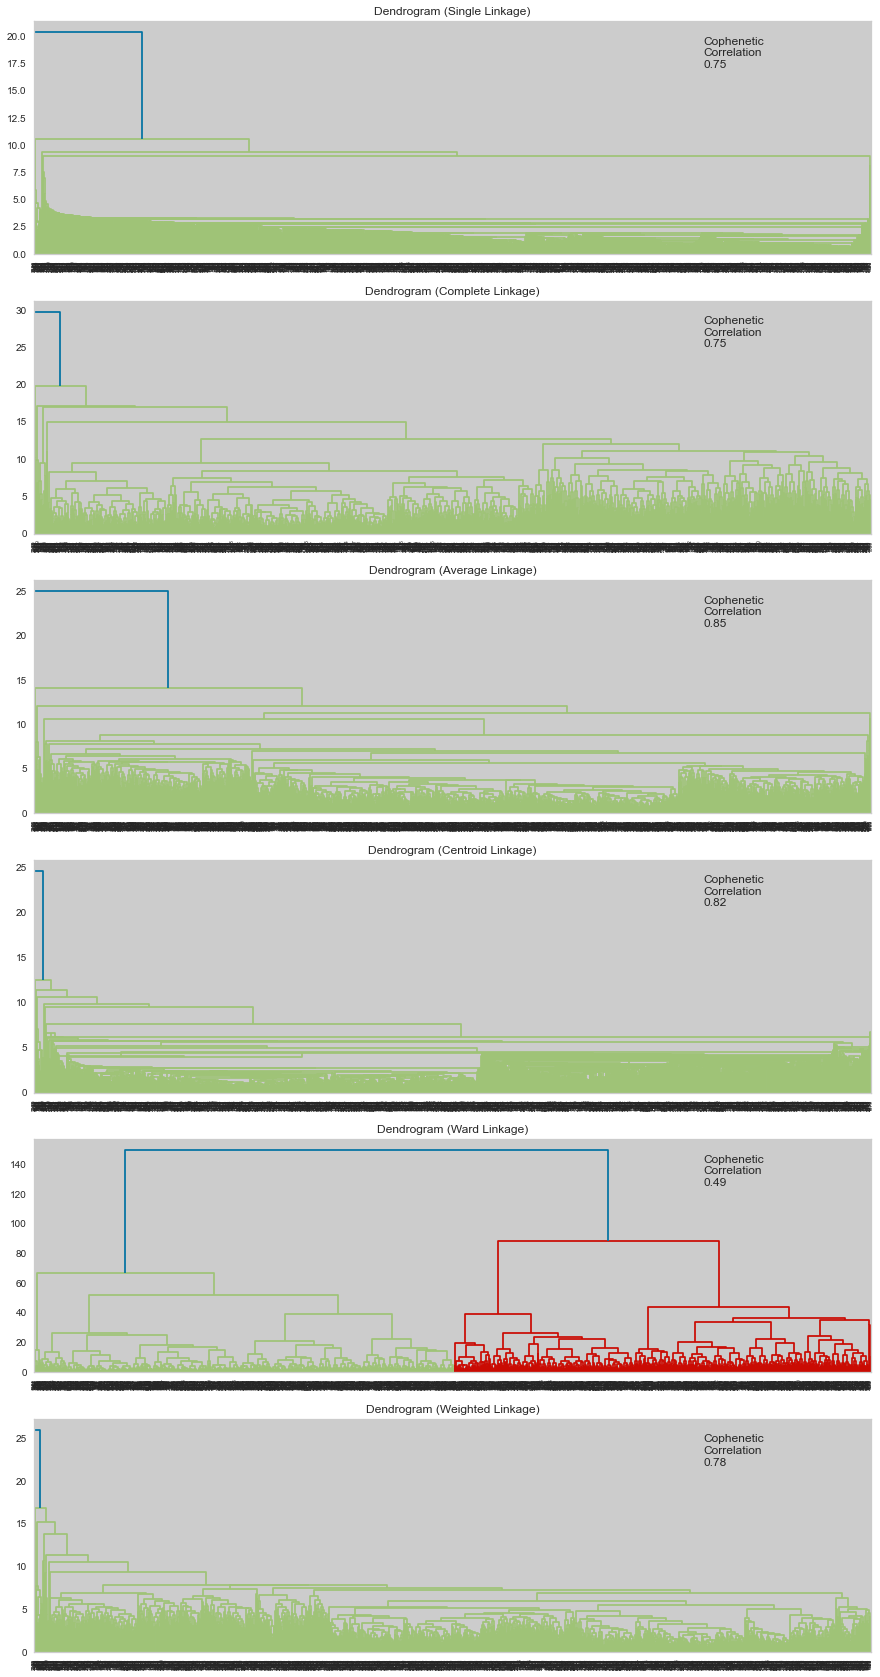

In [72]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_cust_HC, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_cust_HC))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

*Observations*:
- The cophenetic correlation is highest for average and centroid linkage methods
- We will move ahead with average linkage
- 2 appears to be the appropriate number of clusters from the dendrogram for average linkage (drawing a horizontal line around height 14)

In [73]:
HCmodel = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_cust_HC)

AgglomerativeClustering(linkage='average')

In [74]:
cust_HC["HC_Clusters"] = HCmodel.labels_
subset_scaled_cust_HC["HC_Clusters"] = HCmodel.labels_

#### Cluster Profiling for Euclidean distance metric & Average linkage

In [75]:
cluster_profile_HC = cust_HC.groupby("HC_Clusters").mean()

In [76]:
cluster_profile_HC["count_in_each_segments"] = (
    cust_HC.groupby("HC_Clusters")["Income"].count().values
)

cluster_profile_HC

Income   Kidhome  Teenhome    Recency    MntWines  \
HC_Clusters                                                             
0             51958.810579  0.441682  0.505877  49.019439  305.287523   
1            666666.000000  1.000000  0.000000  23.000000    9.000000   

             MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
HC_Clusters                                                                  
0            26.329566       167.029837        37.648734         27.046564   
1            14.000000        18.000000         8.000000          1.000000   

             MntGoldProds  NumDealsPurchases  NumWebPurchases  \
HC_Clusters                                                     
0               43.925859           2.324593         4.088156   
1               12.000000           4.000000         3.000000   

             NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
HC_Clusters                                                              
0                       2.672242            5.80651           5.321429   
1                       1.000000            3.00000           6.000000   

             Complain        Age   Enroll_Dur  Total_Spend  Offers_Accepted  \
HC_Clusters                                                                   
0            0.009042  54.086347  3743.144213   607.268083         0.448915   
1            0.000000  46.000000  3899.000000    62.000000         0.000000   

             Education_Advanced  Education_Graduate  Marital_Status_Alone  \
HC_Clusters                                                                 
0                      0.382007            0.617993               0.35443   
1                      0.000000            1.000000               0.00000   

             Marital_Status_Together  count_in_each_segments  
HC_Clusters                                                   
0                            0.64557                    2212  
1                            1.00000                       1

* We see that there is 1 cluster with 1 datapoint, and all the other data points are grouped into 1 other cluster. This clustering does not look good as it doesn't not provide any useful insight.

* We will try using Ward linkage as it has more distinct and separated clusters (as seen from its dendrogram above). 3 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.

In [77]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_cust_HC)

AgglomerativeClustering(n_clusters=3)

In [78]:
cust_HC["HC_Clusters"] = HCmodel.labels_
subset_scaled_cust_HC["HC_Clusters"] = HCmodel.labels_

#### Cluster Profiling for Euclidean distance metric & Ward linkage

In [79]:
cluster_profile_HC = cust_HC.groupby("HC_Clusters").mean()

In [80]:
cluster_profile_HC["count_in_each_segments"] = (
    cust_HC.groupby("HC_Clusters")["Income"].count().values
)

cluster_profile_HC

Income   Kidhome  Teenhome    Recency    MntWines  \
HC_Clusters                                                            
0            36383.320144  0.750899  0.464029  48.589029   58.193345   
1            75322.448882  0.054313  0.206070  49.266773  580.849840   
2            58925.157895  0.229474  0.997895  49.646316  519.962105   

             MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
HC_Clusters                                                                  
0             6.316547        30.666367         8.955036          6.167266   
1            66.872204       428.241214        97.512780         69.303514   
2            19.724211       141.701053        25.865263         20.181053   

             MntGoldProds  NumDealsPurchases  NumWebPurchases  \
HC_Clusters                                                     
0               18.027878           2.103417         2.367806   
1               77.223642           1.471246         5.206070   
2               60.604211           3.970526         6.640000   

             NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
HC_Clusters                                                              
0                       0.692446           3.517986           6.315647   
1                       5.672524           8.348243           3.003195   
2                       3.349474           7.808421           6.050526   

             Complain        Age   Enroll_Dur  Total_Spend  Offers_Accepted  \
HC_Clusters                                                                   
0            0.017986  51.817446  3713.975719   128.326439         0.186151   
1            0.000000  54.677316  3742.798722  1320.003195         0.932907   
2            0.000000  58.602105  3812.212632   788.037895         0.425263   

             Education_Advanced  Education_Graduate  Marital_Status_Alone  \
HC_Clusters                                                                 
0                      0.360612            0.639388              0.343525   
1                      0.333866            0.666134              0.376997   
2                      0.494737            0.505263              0.349474   

             Marital_Status_Together  count_in_each_segments  
HC_Clusters                                                   
0                           0.656475                    1112  
1                           0.623003                     626  
2                           0.650526                     475

In [81]:
# let's display cluster profile
cluster_profile_HC.style.highlight_max(color="lightgreen", axis=0)

* The clusters seem to have more variability with Ward linkage 

**Let's plot the variable values for each cluster**

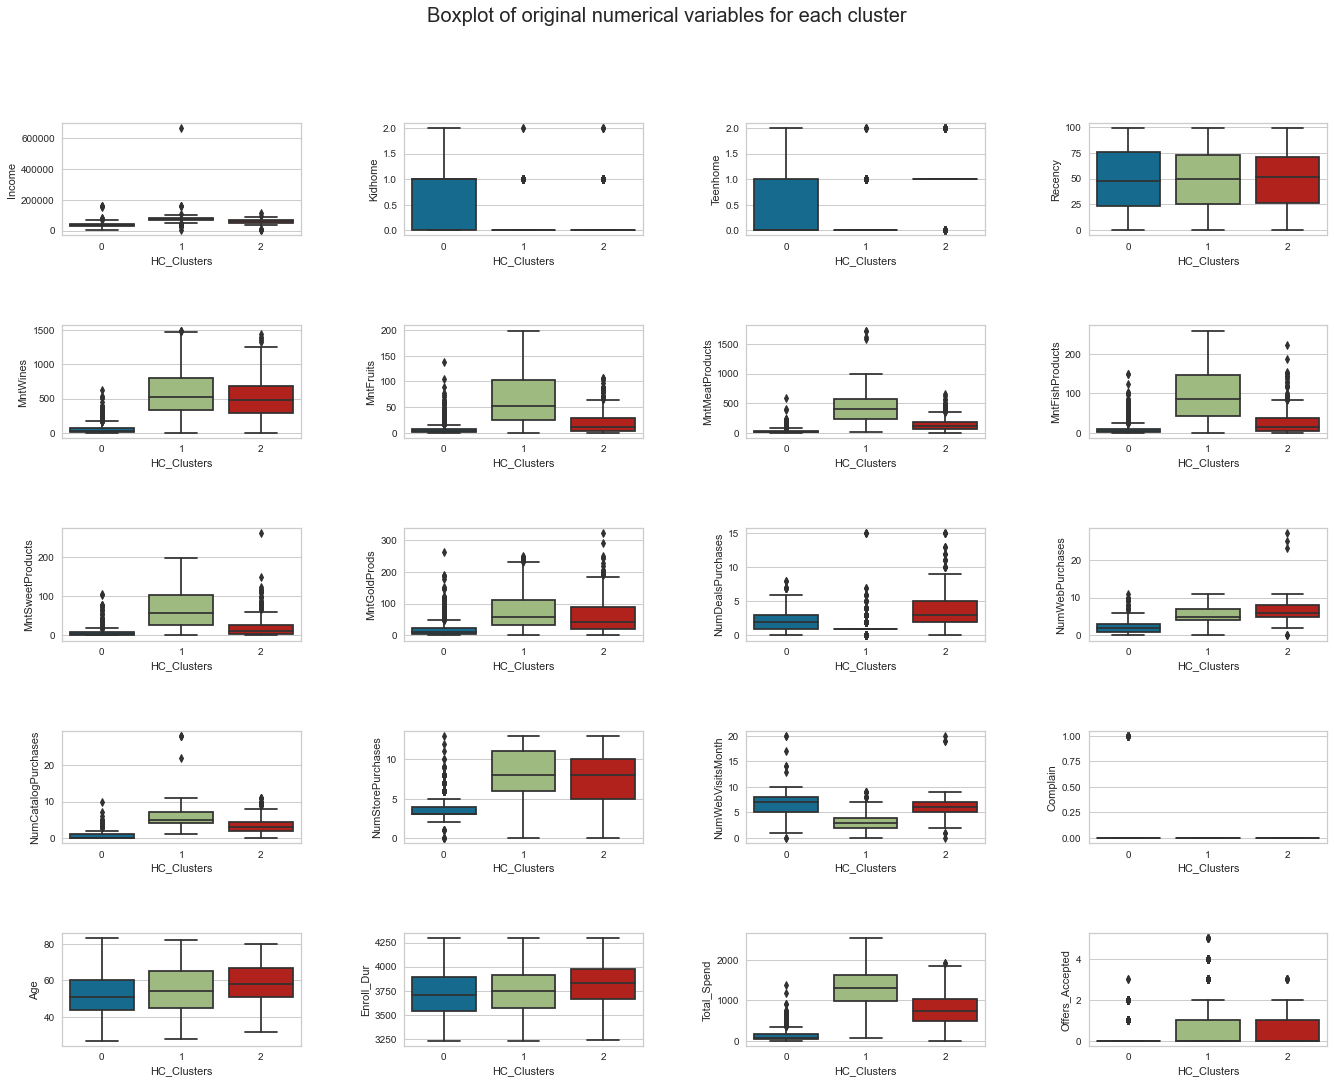

In [82]:
fig, axes = plt.subplots(round(len(col_num)/4), 4, figsize=(20, 16)) 

fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

counter = 0
for name in col_num:    
    i, j = divmod(counter, 4)
    sns.boxplot(ax=axes[i,j], y=cust_HC[name], x=cust_HC["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=5.0)

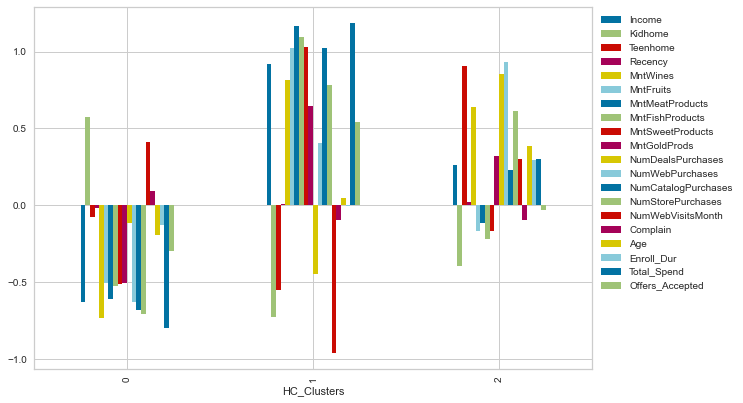

In [83]:
subset_scaled_cust_HC.groupby("HC_Clusters").mean().plot.bar(figsize=(10, 6.667))

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

## Insights

- **Cluster 0**
   - There are 1112 data points in this cluster
   - Average income of customers in this cluster was low
   - This cluster had customers with typically higher than average number of kids at home
   - This group of customers had close to a population average number of teenagers
   - This set of customers typically spent very little on wines
   - These customers didn't spend much on fruits, meat and fish products, or sweets
   - This cluster did not spend much on gold products
   - Not many deal purchases were made by customers in this cluster
   - Fewer purchases were made on the web by this group of customers
   - This group made few catalog purchases
   - Very few store purchases were made by customers in this set
   - This set of customers visited the company website most frequently last month
   - The average total spend was quite low for customers in this group
   - This group accepted very few offers on average
  
   
- **Cluster 1**
   - There are 626 data points in this cluster
   - Average income of customers in this cluster was high
   - This cluster had customers with typically fewer kinds than the average for the customer population 
   - This group of customers had fewer number of teenagers than the average customer population
   - This set of customers typically spent much higher on wines than an average customer in the population
   - These customers spent much higher than average customer population on fruits, meat and fish products, as well as sweets
   - This cluster spent the most on gold products
   - The number of deal based purchases made by customers in this cluster were below the overall population average
   - A larger number of web purchases were made by this set of customers compared to the average customer in the population 
   - This group made highest number of catalog purchases
   - This group made the highest number of store purchases
   - This set of customers had the least number of visits to the company website last month
   - The average total spend was high for customers in this group at over twice that of the overall population average
   - This group accepted a large number of offers on average
   
   
- **Cluster 2**
   - There are 475 data points in this cluster
   - The customers in this cluster had an intermediate level of income that was close to that of the overall population average
   - This cluster had customers with similar number of kids at home as the general customer population
   - This group of customers had on average more teenagers at home than the average customer in the population
   - This set of customers typically spent more than average on wines vs the broader customer population
   - These customers on average spent less than the average customer on fruits, meat and fish products, and sweets
   - This cluster spent more on gold products than the average customer in the population
   - This group of customers made more purchases based on deals than the average customer population
   - This group of customers made significantly larger number of purchases online than the average customer population
   - This group made a similar number of catalog purchases as the general customer population
   - These customers made more purchases in-store than an average customer in the general population
   - This set of customers visited the company website frequently last month
   - The average total spend by these customers was close to the average spend by the overall set of customers
   - This group typically accepted a number of offers similar to the general customer population 
    
The relationship between features within clusters 0, 1, 2 are consistent with the bivariate analysis from the prior EDA.

### 9. K-means vs Hierarchical Clustering

**We compare the results from K-means and Hierarchical Clustering using a few criteria:**

#### Number of clusters:
- With the Elbow method, we get an optimal k=4 based on k-means. Investigating the insights from these clusters, we recommend combining two clusters into one to establish a total of 3 clusters based on similarities in Cluster 0 and Cluster 3 of the original 4 clusters. For hierarchical clustering, with euclidean distance and average linkage (which has the highest cophenetic correlation), we get k=2 as an appropriate estimate. However, due to the variability in the clustering, we choose the ward linkage with euclidean distance which leads to k=3 as a reasonable number of clusters (confirmed by visual inspection of the dendrogram). So k-means and hierarchical clusters largely give similar values of optimal number of clusters

#### Number of data points per cluster:
- K-means has 4 clusters associated with it with 564, 548, 542, 559 data points. Combining the first and the last clusters, we would get clusters with 1123, 548, 542 data points.
- Hierarchical clustering with Euclidean distance and Ward linkage has 3 clusters associated with it with 1112, 626, 475 data points
- So both approaches yield somewhat similar clusters in terms of number of data points within them

#### Cluster profiling:
- Overall cluster compositions seems quite similar in terms of the features (e.g. `Income`, `Total_Spend`) looking at the 3 clusters from k-means and hierarchical clustering
- Cluster No. 0 from hierarchical clustering corresponds to Cluster No. 0 (when the original Cluster no. 0 and Cluster no. 4 are merged into Cluster no. 0) from k-means in terms of means and trends of the features 
- Cluster No. 1 from hierarchical clustering corresponds to Cluster No. 1 from k-means in terms of means and trends of the features 
- Cluster No. 2 from hierarchical clustering corresponds to Cluster No. 2 from k-means in terms of means and trends of the features 

### 10. Actionable Insights & Recommendations

- We can use either the k-means or the hierarchical clustering approach (using Ward linkage and Euclidean distance) to group the data points into clusters (3 clusters appear optimal)
- The cluster profiles are similar for the clusters from both k-means and from hierarchical clustering

### Recommendations for business

- **Cluster 0 from Hierarchical clustering**: These are lower income customers. As we might expect, the total spend by these customers across channels is also low, most likely due to lower disposable income. They also have a higher number of kids at home and visit the company website most often. They did not make use of a large number of deals or offers. **Given that their spend is likely to be limited by their income, it may be prudent to avoid a lot of focus on this customer segment and direct marketing efforts and funds elsewhere.** 


- **Cluster 1 from Hierarchical clustering**: These are higher income customers with almost twice the spend as the general average population. They have fewer kids and teenagers at home. They purchase heavily across channels but do not purchase much on deals or visit the company website very often compared to the other customer groups. **Given their high spending pattern and high income, it is recommended to target this group with marketing all products, especially premium products via catalogs and stores. Since they do not necessarily look for discounts to make a purchase, we may not gain much by offering discounts and reducing the selling price on a product when this group may be willing to pay full price. The company should investigate why this group doesn't visit its website very often even though they make above average web-based purchases. There may be an opportunity to increase web purchases by increasing traffic from this group to the website.**


- **Cluster 2 from Hierarchical clustering**: These are middle income customers with income and spend closer to the customer population average. They typically have more teenagers at home than average of the overall customer population. They tend to spend more than average on wines but somewhat lower than average on other products. This group also made the most use of deals for purchases indicating some degree of price sensitivity. They did many purchases online and had a higher than average website visits. They also purchased a fair amount of items in stores. **Given the propensity of these customers to buy products on deals, the company should market discounted products and promotions to this group, especially wines. Since they buy a lot of products online in addition to surfing the company website, it may be worthwhile to send deals and recommendations online to these customers.**